# Classification of Hotel Reviews based on the review text (Excellent,Good or Bad)

## Understanding the Data and Preprocessing the Data

### Importing required Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import warnings

In [2]:
import keras
import nltk
import re
import codecs

C:\Users\Gnanendra\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# General
import numpy as np
import pandas as pd
import nltk
import random
import os
from os import path
from PIL import Image

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

# Set Plot Theme
sns.set_palette([
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",
])
plt.style.use('fivethirtyeight')

# Pre-Processing
import string
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer

# Modeling
import statsmodels.api as sm
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk.util import ngrams
from collections import Counter
from gensim.models import word2vec

# Warnings
import warnings
warnings.filterwarnings('ignore')


C:\Users\Gnanendra\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


### Reading and Exploring the Data

In [4]:
os.chdir("D:/PhD")

In [5]:
hotels = pd.read_csv("Train-1554810061973.csv", parse_dates=[3])

#### While reading the date I have provided parse_dates for the conversion of Date column to datetime format

In [6]:
hotels.head()

,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment
0,Review_1,hotel_101,hotel_1608,2007-11-16,Nice Marriot View of my king bed room,good
1,Review_2,hotel_101,hotel_6939,2007-10-30,"Good hotel, charges for internet access The Ma...",good
2,Review_3,hotel_101,hotel_3976,2007-10-12,Small but adequate rooms If you have an early ...,good
3,Review_4,hotel_101,hotel_2851,2007-08-31,"Better than average, some noisy rooms I have s...",good
4,Review_5,hotel_101,hotel_7897,2007-07-18,Ordinary Although it is highly rated in these ...,bad


In [7]:
hotels.tail()

,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment
6282,Review_6283,hotel_200,hotel_10272,2004-07-31,A Very Nice Boutique Hotel Had a recent stay i...,good
6283,Review_6284,hotel_200,hotel_1120,2004-07-16,My Home in NYC I happened upon the Giraffe in ...,excellent
6284,Review_6285,hotel_200,hotel_7086,2004-07-08,Fantastic New York Hotel! My husband and I don...,excellent
6285,Review_6286,hotel_200,hotel_7909,2004-06-18,It's our new favorite hotel!! After staying at...,excellent
6286,Review_6287,hotel_200,hotel_4472,2004-05-18,Terrific Hotel in the Union Square/Grammercy P...,excellent


In [8]:
print ('The train data has {0} rows and {1} columns'.format(hotels.shape[0],hotels.shape[1]))

The train data has 6287 rows and 6 columns


#### Attributes given are Hotels ID's, ReviewID, UserID, Date, reviewtext and the corresponding Sentimnet

In [9]:
hotels.describe(include='all' )

,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment
count,6287,6287,6287,6287,6287,6287
unique,6287,100,6100,1310,6287,3
top,Review_983,hotel_188,hotel_4370,2007-05-29 00:00:00,Excellent Hotwire ticker to be exact.This hote...,good
freq,1,521,4,21,1,3213
first,NaN,NaN,NaN,2004-01-04 00:00:00,NaN,NaN
last,NaN,NaN,NaN,2007-12-31 00:00:00,NaN,NaN


#### Setting the MaxColmun width to 500 for the better reading of reviewtext

In [10]:
pd.set_option('max_colwidth', 500)

In [11]:
hotels.tail()

,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment
6282,Review_6283,hotel_200,hotel_10272,2004-07-31,"A Very Nice Boutique Hotel Had a recent stay in NYC and stayed in one of their upscale suites. The rooms were clean and the amenities nice. One of the elevators was not working during my stay, so it took forever to get up and down to the lobby. Also requested a bucket of ice which never arrived from room service. The continental breakfast w/ juices was quite enjoyable. Would recommend with some reservations.",good
6283,Review_6284,hotel_200,hotel_1120,2004-07-16,"My Home in NYC I happened upon the Giraffe in 2001. Since then I (alone or with my wife) have stayed at this beautiful hotel about ten times. Unless omething beyond my control prevents me from taking a room at the Giraffe, this is my home in NYC. When you see the Giraffe I am confident that you will understand my loyalty. The common areas --the lobby (that also serves as the breakfast room in the morning and the location for wine and cheese in the evening (with a piano playeras a bonus)) and...",excellent
6284,Review_6285,hotel_200,hotel_7086,2004-07-08,Fantastic New York Hotel! My husband and I don't have to stay in New York hotels due to my in-laws nice apartment - however this past weekend it so happened there was no room at that inn so we tried Hotel Giraffe because of the reviews we read on trip advisor. And I'm happy to say our experience was really great! The room are large and extremely clean especially for New York City hotels (we stayed at the Peninsula recently and it wasn't as nice unless you got a very pricey deluxe room). The ...,excellent
6285,Review_6286,hotel_200,hotel_7909,2004-06-18,"It's our new favorite hotel!! After staying at many New york City Hotels-- including grand old and boutique-- this was by far the best, Our one bedroom suite was spacious for NYC...beautiful decor with a balcony! The staff was consistently friendly, helpful and professional, from reservations to turn-down service. The complimentary food and beverage offerings went beyond the norm as well. Location was great-- and QUIET!! It's the only place we'll stay from now on.",excellent
6286,Review_6287,hotel_200,hotel_4472,2004-05-18,"Terrific Hotel in the Union Square/Grammercy Park Area The Hotel Giraffe is a very, very good hotel in an area where there are relatively few hotels. The location was just about perfect for my visit--I needed to be near my friends @ the W Union Square. The hotel is immaculately maintained. The lobby is extremely spacious for a relatively small hotel, and the decor/furninshings are tasteful, comfortable, and welcoming. The staff are, for the most part, excellent, though I did encounter one be...",excellent


In [12]:
dtype_df = hotels.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,datetime64[ns],1
1,object,5


#### There are 6 attributes.. 5 are object Type and 1 is Date Type

### Checking for the missing values

In [13]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns


In [14]:
missing_values_table(hotels)

Your selected dataframe has 6 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


#### There are no missing values in the given data set

### Checking the Unique value counts

In [15]:
unique_counts = pd.DataFrame.from_records([(col, hotels[col].nunique()) for col in hotels.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts

,Column_Name,Num_Unique
5,Sentiment,3
1,Hotelid,100
3,Date,1310
2,userid,6100
0,Reviewid,6287
4,reviewtext,6287


#### Target attribute Sentiment has 3 classes, Data given is for reviews of 100 hotels, 6100 userid's means there are few users given ratings more than one time. ReviewID and ReviewText are unique. Reviews date spread across 1310 days

### Understanding the Distribution of Sentiment Class (Target Varaible)

In [16]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

2.2.2
0.8.1


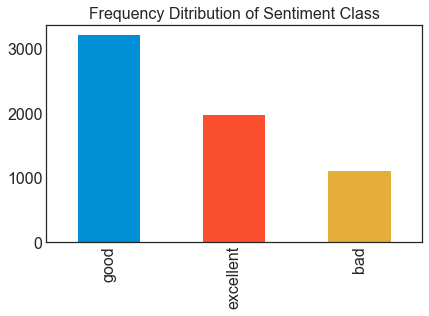

In [17]:
hotels['Sentiment'].value_counts().plot.bar(title="Frequency Ditribution of Sentiment Class")

#### From the above distribution given hotels are having 3000+ Good Ratings, nearly 2000 Excellent ratings and about 1000 bad ratings. There seems to be no Data Imbalance here

### Let us work with Date Column to see reviews trend over the time

#### Just extracting Date column for the analysis

In [18]:
dates = hotels['Date']

In [19]:
dates.head()

0   2007-11-16
1   2007-10-30
2   2007-10-12
3   2007-08-31
4   2007-07-18
Name: Date, dtype: datetime64[ns]

#### Feature Engineering the Date and getting new values like quarter, month, week, day from it

In [20]:
date_expanded = pd.DataFrame({"year": dates.dt.year,
              "month": dates.dt.month,
              "dayofmonth": dates.dt.day,
              "dayofyear": dates.dt.dayofyear,
              "week": dates.dt.week,
              "weekofyear": dates.dt.weekofyear,
              "dayofweek": dates.dt.dayofweek,
              "weekday": dates.dt.weekday,
              "quarter": dates.dt.quarter,
             })

In [21]:
date_expanded.head()

,year,month,dayofmonth,dayofyear,week,weekofyear,dayofweek,weekday,quarter
0,2007,11,16,320,46,46,4,4,4
1,2007,10,30,303,44,44,1,1,4
2,2007,10,12,285,41,41,4,4,4
3,2007,8,31,243,35,35,4,4,3
4,2007,7,18,199,29,29,2,2,3


In [22]:
date_expanded['quarter'] = date_expanded['quarter'].map({1: 'Quarter 1', 2: "Quarter 2", 3:'Quarter 3', 4: 'Quarter 4'})

In [24]:
date_expanded['month'] = date_expanded['month'].map({1: 'Jan', 2: "Feb", 3:'Mar', 4: 'Apr',5: 'May', 6: "Jun", 7:'Jul', 8: 'Aug',9: 'Sep', 10: "Oct", 11:'Nov', 12: 'Dec'})

In [26]:
date_expanded['dayofweek'] = date_expanded['dayofweek'].map({0: 'Monday', 1: "Tuesday", 2:'Wednesday', 4: 'Thursday',5: 'Friday', 6: "Saturday", 7:'Sunday'})

In [27]:
date_expanded.head()

,year,month,dayofmonth,dayofyear,week,weekofyear,dayofweek,weekday,quarter
0,2007,Nov,16,320,46,46,Thursday,4,Quarter 4
1,2007,Oct,30,303,44,44,Tuesday,1,Quarter 4
2,2007,Oct,12,285,41,41,Thursday,4,Quarter 4
3,2007,Aug,31,243,35,35,Thursday,4,Quarter 3
4,2007,Jul,18,199,29,29,Wednesday,2,Quarter 3


#### Let us look at the no of reviews given in each year

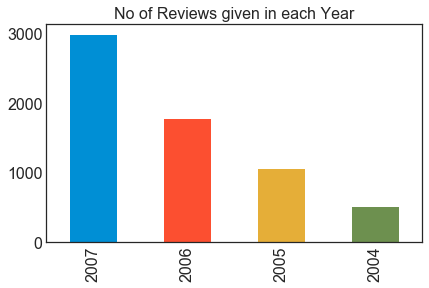

In [28]:
date_expanded['year'].value_counts().plot.bar(title="No of Reviews given in each Year")

#### In the year 2007 there are more no of reviews given and 2004 is least. Reviews are in descending order from 2007 to 2004

### Let us look at the No of Reviews given each quarter for all the years

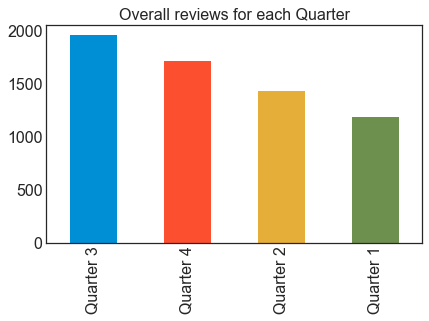

In [30]:
date_expanded['quarter'].value_counts().plot.bar(title= "Overall reviews for each Quarter")

#### Quarter 3 has more no of reviews means more visits to hotel, and Quarter 1 has less no of reviews

### A look at the no of reviews given for each month across all the years

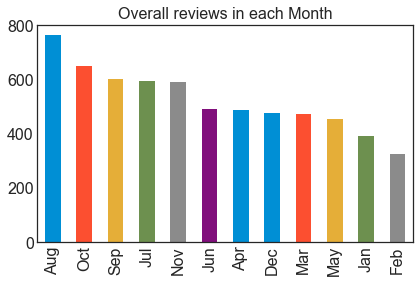

In [31]:
date_expanded['month'].value_counts().plot.bar(title= "Overall reviews in each Month")

#### August month has more no of reviews followed by October where as Feb and Jan months has the least no of reviews

### Let's check the review trend for weeks in all the years

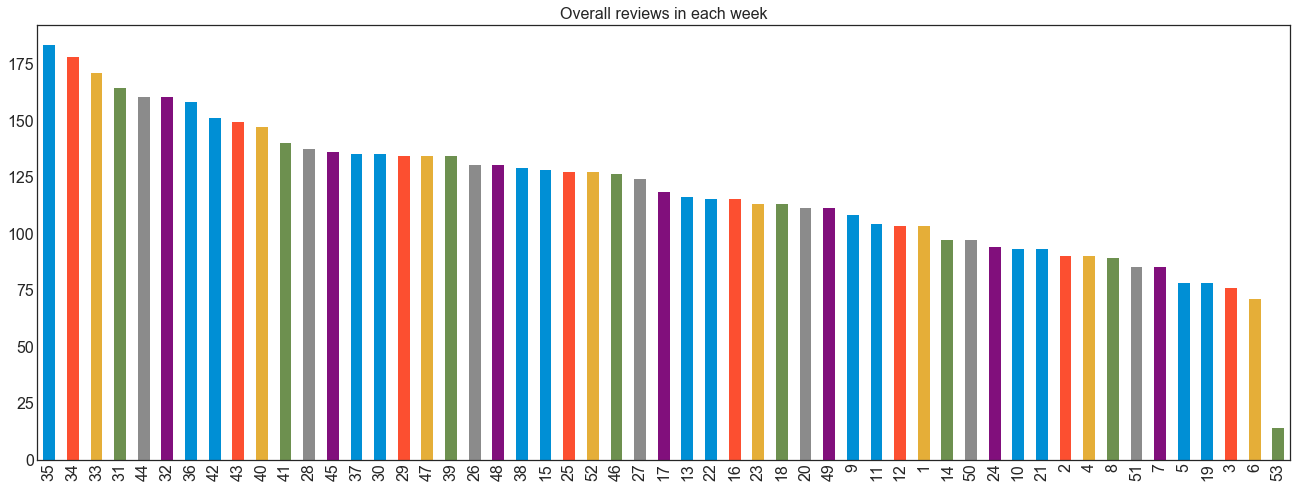

In [32]:
date_expanded['week'].value_counts().plot.bar(title= "Overall reviews in each week",figsize = (20,8))

#### Week 35,33,34 and31 in the calender year has more no of reviews, and those weeks belongs to August month in 2004,2005,2006 and in 2007.. So again we can confirm that more no of reviews in August month

In [33]:
date_expanded.head()

,year,month,dayofmonth,dayofyear,week,weekofyear,dayofweek,weekday,quarter
0,2007,Nov,16,320,46,46,Thursday,4,Quarter 4
1,2007,Oct,30,303,44,44,Tuesday,1,Quarter 4
2,2007,Oct,12,285,41,41,Thursday,4,Quarter 4
3,2007,Aug,31,243,35,35,Thursday,4,Quarter 3
4,2007,Jul,18,199,29,29,Wednesday,2,Quarter 3


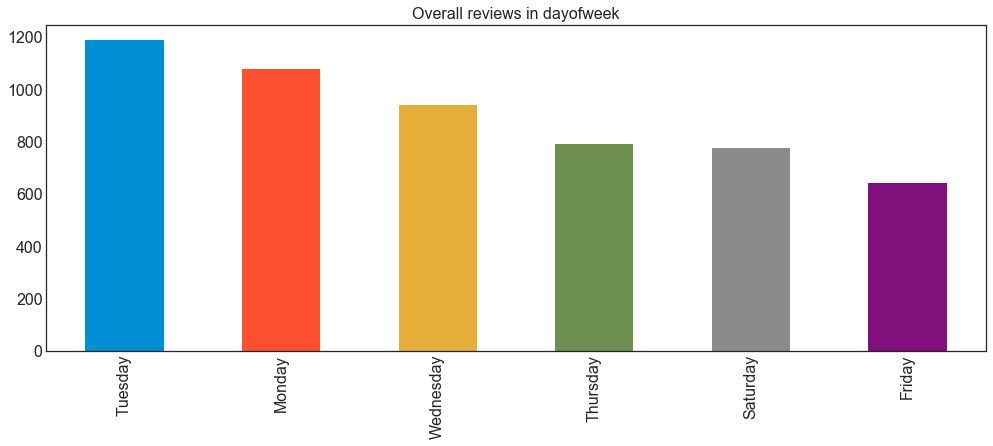

In [34]:
date_expanded['dayofweek'].value_counts().plot.bar(title= "Overall reviews in dayofweek", figsize = (15,6))

### Let us look at the Day wise reviews in a month for all the years

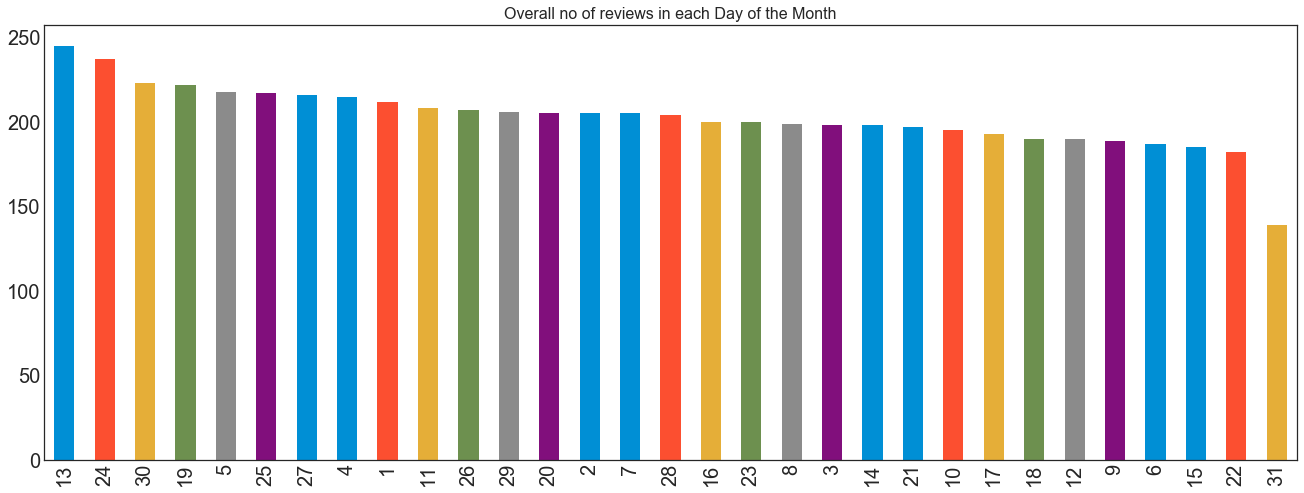

In [35]:
date_expanded['dayofmonth'].value_counts().plot.bar(title="Overall no of reviews in each Day of the Month", figsize = (20,8), fontsize = 20)

In [36]:
date_new = date_expanded['dayofyear'].value_counts().head(20)

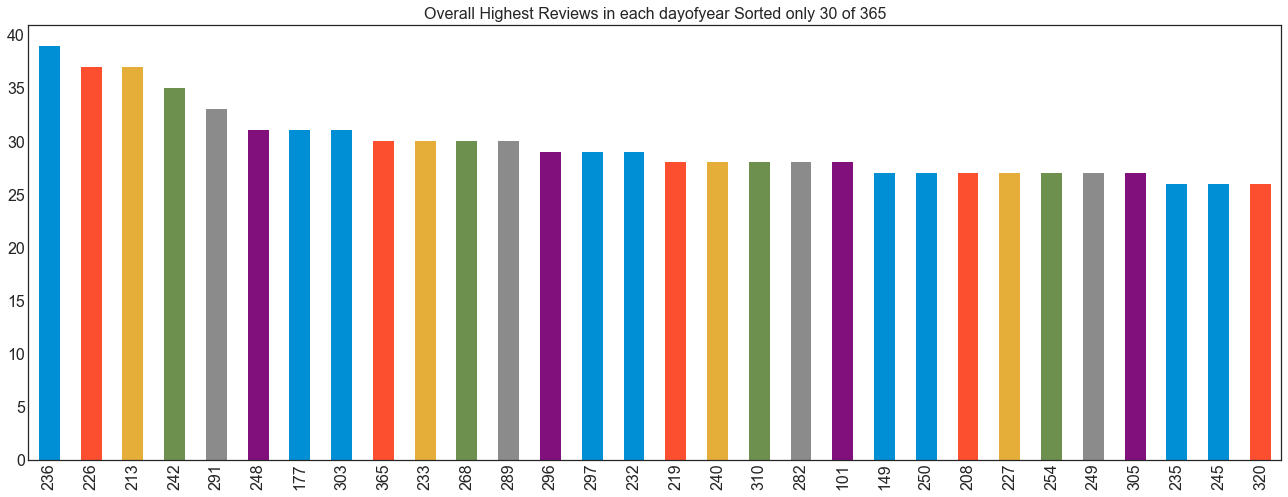

In [37]:
date_expanded['dayofyear'].value_counts().head(30).plot.bar(title= "Overall Highest Reviews in each dayofyear Sorted only 30 of 365",figsize = (20,8))

#### Again 236th day, 226th day are falls in August month, maximum reviews are 40

### Let us have a look at the review ditribution in each day of the year with least count

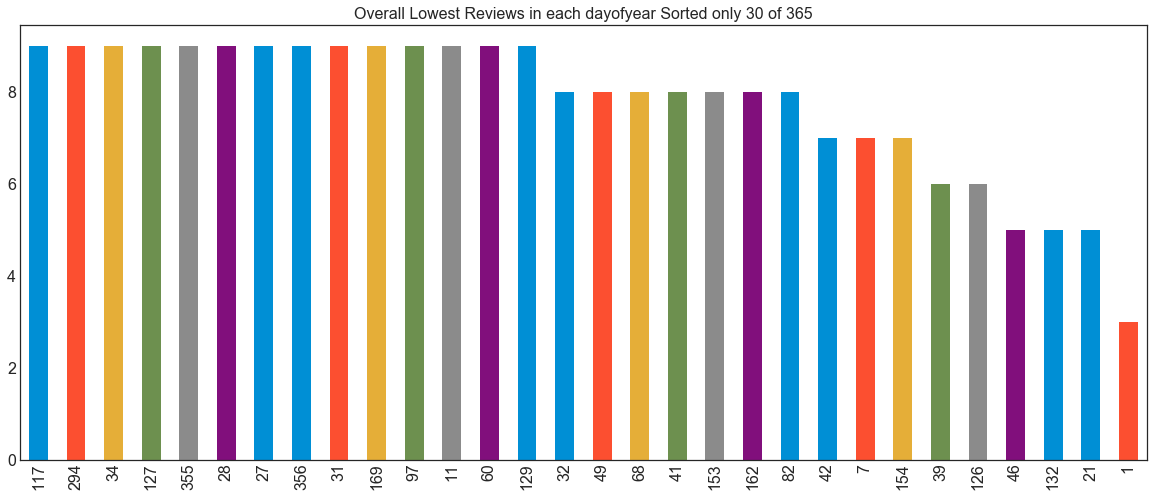

In [38]:
date_expanded['dayofyear'].value_counts().tail(30).plot.bar(title= "Overall Lowest Reviews in each dayofyear Sorted only 30 of 365",figsize = (18,8))

#### Its not suprise that Starting day of the year Jan 1st having very less no of reviews across all the years

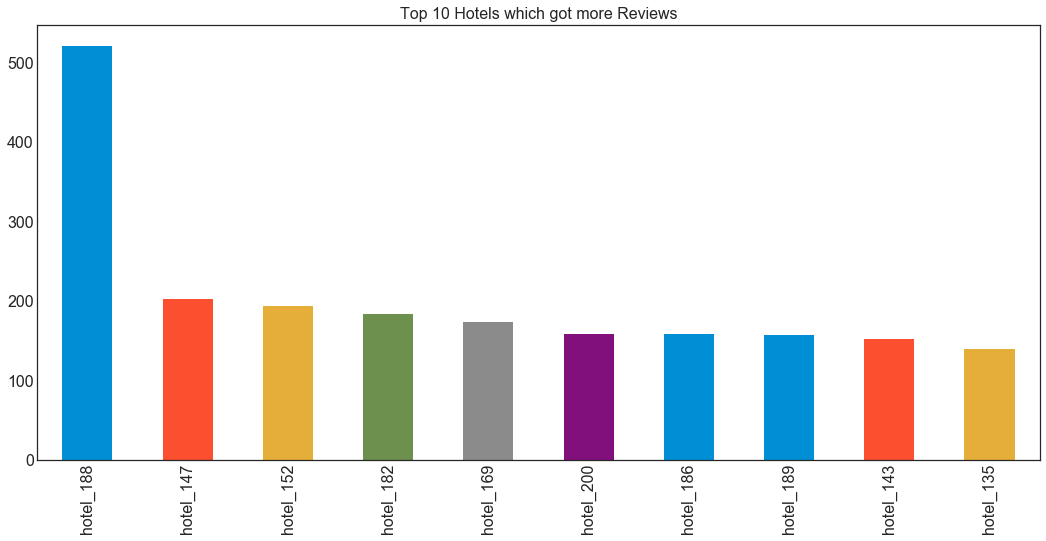

In [39]:
hotels['Hotelid'].value_counts().head(10).plot.bar(title= "Top 10 Hotels which got more Reviews",figsize = (16,8))

#### Hotel with HotelID 188 got more no of reviews above 500

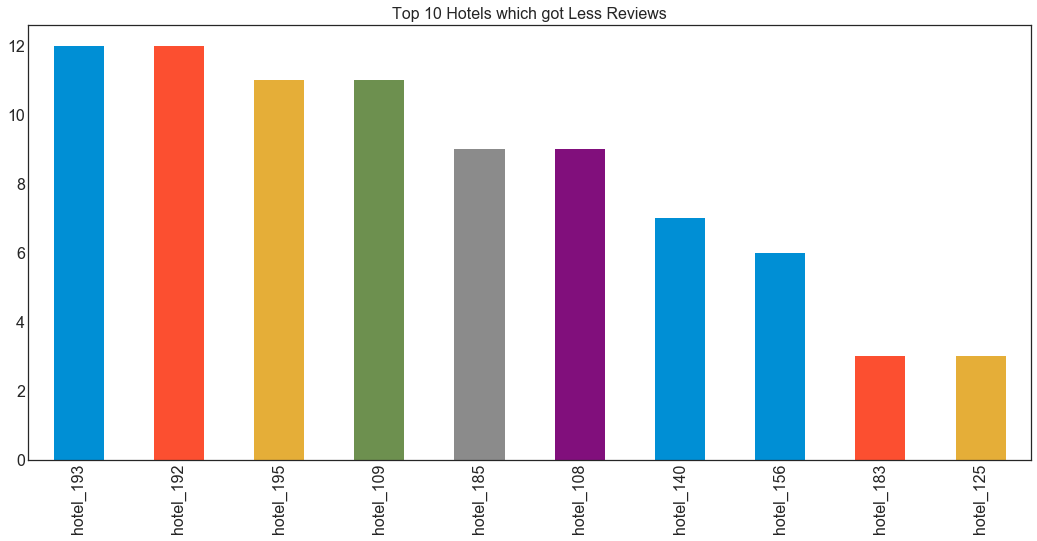

In [40]:
hotels['Hotelid'].value_counts().tail(10).plot.bar(title= "Top 10 Hotels which got Less Reviews",figsize = (16,8))

#### Hotel with HotelID 183 and 123 got less no of reviews , only 2

### Let us combine the Date_expanded with hotels data for further undersating

In [41]:
hotels = pd.concat([hotels, date_expanded], axis=1)

In [42]:
hotels.tail(1)

,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment,year,month,dayofmonth,dayofyear,week,weekofyear,dayofweek,weekday,quarter
6286,Review_6287,hotel_200,hotel_4472,2004-05-18,"Terrific Hotel in the Union Square/Grammercy Park Area The Hotel Giraffe is a very, very good hotel in an area where there are relatively few hotels. The location was just about perfect for my visit--I needed to be near my friends @ the W Union Square. The hotel is immaculately maintained. The lobby is extremely spacious for a relatively small hotel, and the decor/furninshings are tasteful, comfortable, and welcoming. The staff are, for the most part, excellent, though I did encounter one be...",excellent,2004,May,18,139,21,21,Tuesday,1,Quarter 2


#### Year Wise Reviews vs Sentiment

In [43]:
yearwise_reviews = pd.crosstab(index=hotels["Sentiment"], 
                           columns=hotels["year"])
yearwise_reviews

year,2004,2005,2006,2007
Sentiment,,,,
bad,64,157,314,568
excellent,160,342,528,941
good,272,541,931,1469


#### Quarter Wise Reviews Vs Sentiment

In [44]:
quarterwise_reviews = pd.crosstab(index=hotels["Sentiment"], 
                           columns=hotels["quarter"])
quarterwise_reviews

quarter,Quarter 1,Quarter 2,Quarter 3,Quarter 4
Sentiment,,,,
bad,228,226,324,325
excellent,368,434,658,511
good,592,770,974,877


#### Month Wise Reviews Vs Sentiment

In [45]:
monthwise_reviews = pd.crosstab(index=hotels["Sentiment"], 
                           columns=hotels["month"])
monthwise_reviews

month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Sentiment,,,,,,,,,,,,
bad,72,109,91,56,82,95,79,90,75,105,129,120
excellent,150,267,145,100,123,212,150,145,134,179,187,179
good,266,387,238,170,186,287,261,236,243,305,334,300


#### Week Wise Reviews Vs Sentiment

In [46]:
pd.options.display.max_columns = None

In [47]:
weekwise_reviews = pd.crosstab(index=hotels["Sentiment"], 
                           columns=hotels["week"])
weekwise_reviews

week,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
Sentiment,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bad,18,16,16,22,11,16,15,16,19,23,13,19,23,11,17,21,22,10,16,22,16,21,20,11,17,25,16,23,21,25,19,21,27,29,28,20,32,28,34,27,27,32,32,27,29,26,17,21,24,21,12,26,3
excellent,28,32,27,25,23,26,16,35,27,26,33,32,44,33,37,37,32,39,29,29,19,39,25,30,40,45,44,47,48,52,70,54,55,61,58,51,36,30,44,40,39,53,41,48,33,38,41,47,32,27,29,42,3
good,57,42,33,43,44,29,54,38,62,44,58,52,49,53,74,57,64,64,33,60,58,55,68,53,70,60,64,67,65,58,75,85,89,88,97,87,67,71,56,80,74,66,76,85,74,62,76,62,55,49,44,59,8


#### Day Wise Reviews Vs Sentiment

In [48]:
dayofmonthwise_reviews = pd.crosstab(index=hotels["Sentiment"], 
                           columns=hotels["dayofmonth"])
dayofmonthwise_reviews

dayofmonth,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
Sentiment,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bad,32,35,36,36,36,33,27,36,34,35,48,35,49,34,26,33,35,33,38,44,31,20,44,45,41,47,33,42,32,31,22
excellent,74,80,61,62,74,54,71,54,62,56,70,56,62,61,54,60,56,58,77,60,64,62,62,66,68,59,66,70,73,80,39
good,106,90,101,117,108,100,107,109,93,104,90,99,134,103,105,107,102,99,107,101,102,100,94,126,108,101,117,92,101,112,78


In [49]:
dayofyearwise_reviews = pd.crosstab(index=hotels["Sentiment"], 
                           columns=hotels["dayofyear"])
dayofyearwise_reviews

dayofyear,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365
Sentiment,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bad,1,6,6,2,3,1,0,5,1,2,1,2,3,3,4,0,3,3,3,4,0,1,3,3,4,6,2,3,2,4,1,1,0,0,1,3,3,3,1,3,2,2,1,6,2,1,3,2,2,2,1,2,4,4,0,1,2,0,4,2,5,2,4,3,2,4,2,2,1,7,3,3,3,2,2,0,1,2,3,1,2,3,7,3,4,2,6,4,2,3,1,2,3,3,1,1,1,1,1,3,4,1,4,2,2,3,2,2,4,4,4,0,4,4,1,6,0,4,2,2,2,2,3,1,2,0,1,3,2,4,3,1,3,3,2,2,2,5,2,4,3,3,2,4,1,3,1,1,4,2,4,4,1,2,4,6,2,1,5,1,1,2,5,2,0,1,0,5,1,2,2,1,2,3,3,3,7,4,3,5,1,4,3,1,5,3,1,3,0,6,2,4,3,5,0,1,2,3,1,2,9,4,1,4,5,3,5,3,5,1,1,5,2,2,3,2,2,3,3,4,1,4,1,4,6,7,2,3,7,3,3,4,7,3,2,5,5,2,5,5,5,3,1,4,4,3,3,1,6,5,2,3,5,10,4,2,4,3,1,5,3,4,6,3,1,5,6,9,1,5,2,5,4,3,6,2,2,5,3,3,6,8,3,3,4,6,3,4,6,6,7,7,2,1,2,9,7,4,8,1,1,1,5,2,5,2,6,4,2,7,2,4,4,4,6,5,5,5,4,6,2,1,3,3,2,1,0,2,5,1,6,3,1,4,3,2,5,4,4,5,1,4,2,2,5,4,1,4,1,3,0,3,4,3,3,1,0,2,0,5,4,5,3,2,6
excellent,0,6,7,5,2,3,2,7,6,7,4,5,2,6,4,3,4,6,3,1,2,4,5,4,4,4,3,2,5,4,3,1,7,2,3,4,3,6,4,3,1,2,1,4,2,3,3,2,3,6,4,6,1,5,7,6,1,3,7,4,5,5,1,4,3,4,6,2,3,4,2,5,4,1,6,6,6,7,4,7,4,3,3,7,8,5,10,4,5,7,6,4,3,4,8,2,3,7,4,7,11,4,8,2,3,4,6,3,8,4,4,6,3,5,6,6,2,5,6,6,5,6,7,9,6,2,3,2,4,5,7,3,5,3,3,6,4,5,5,2,1,3,1,3,5,3,3,4,7,8,4,7,5,2,6,1,4,4,2,7,3,2,7,3,7,5,4,1,2,7,4,9,7,5,4,4,10,9,3,10,3,11,5,4,7,8,8,7,5,4,4,11,5,9,4,7,7,9,4,5,7,9,7,9,5,6,5,13,6,10,10,4,12,13,8,6,10,8,14,4,12,11,3,5,7,10,9,5,6,4,16,11,10,7,11,12,9,2,2,9,8,14,9,6,7,7,5,12,9,9,6,4,3,9,7,5,2,8,3,4,4,6,2,3,4,7,4,12,7,7,4,6,6,5,8,7,5,5,7,4,4,8,4,6,6,4,5,7,9,6,13,7,7,3,9,7,4,4,2,2,7,8,9,6,11,10,5,2,8,5,8,3,3,7,5,5,3,6,5,5,5,4,8,11,5,3,8,4,5,9,7,5,5,9,4,5,5,6,7,4,6,3,3,2,8,6,5,5,5,5,3,2,1,4,5,1,6,4,4,4,6,6,8,3,9
good,2,8,6,13,9,7,5,3,5,6,4,5,8,9,4,7,3,5,5,5,3,8,5,10,7,6,4,4,8,7,5,6,4,7,6,7,5,3,1,6,5,3,15,10,7,1,8,10,3,6,5,8,6,6,5,3,9,10,5,3,11,12,7,7,10,7,8,4,6,4,9,12,8,11,4,7,6,11,9,9,4,2,8,10,7,12,8,4,7,7,9,5,14,3,9,7,5,9,6,14,13,7,11,8,11,8,12,9,7,10,8,9,9,13,11,6,7,8,12,8,12,10,4,10,7,4,5,8,3,8,3,1,10,6,12,11,5,15,6,7,10,7,7,10,4,5,9,6,16,11,11,8,2,3,9,10,10,13,9,8,6,4,12,13,7,6,7,6,6,11,16,7,12,9,6,15,14,9,9,7,7,5,6,5,8,9,12,12,11,13,10,9,9,6,6,9,9,12,14,8,8,11,5,7,14,8,5,11,4,10,14,15,23,7,6,9,9,5,11,14,12,9,14,12,12,20,16,16,10,10,4,14,13,14,13,22,10,11,13,14,12,18,12,10,15,12,14,18,12,13,11,7,8,8,11,10,11,8,11,5,11,15,9,9,8,9,7,9,12,6,14,6,5,8,10,16,15,8,6,11,11,12,12,10,11,14,11,7,15,7,13,11,5,5,10,13,18,13,11,7,5,12,17,8,11,10,10,13,11,16,13,10,11,

In [50]:
hotels.head(1)

,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment,year,month,dayofmonth,dayofyear,week,weekofyear,dayofweek,weekday,quarter
0,Review_1,hotel_101,hotel_1608,2007-11-16,Nice Marriot View of my king bed room,good,2007,Nov,16,320,46,46,Thursday,4,Quarter 4


In [51]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

### Let us visualize the above obtained results

Text(0,0.5,'No Of Reviews')

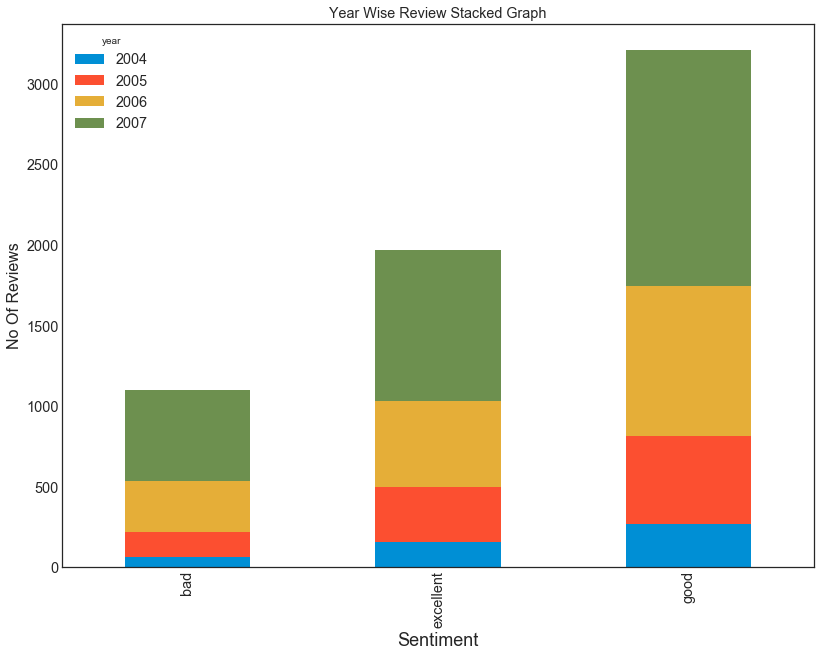

In [52]:
yearwise_reviews.plot(kind="bar", 
                 figsize=(12,10),
                 stacked=True, title= "Year Wise Review Stacked Graph" )
plt.xlabel('Sentiment', fontsize=18)
plt.ylabel('No Of Reviews', fontsize=16)

Text(0,0.5,'No Of Reviews')

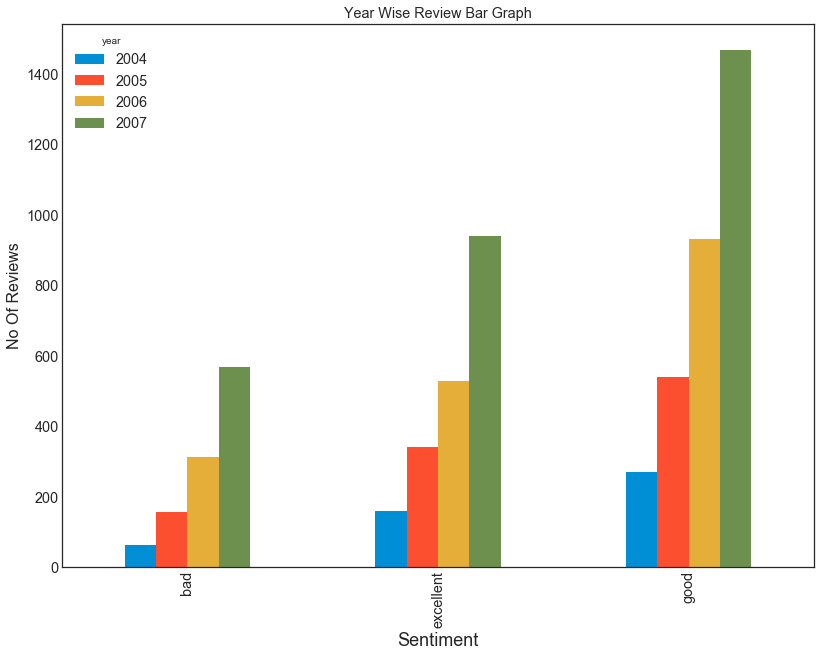

In [53]:
yearwise_reviews.plot(kind="bar", 
                 figsize=(12,10),
                 stacked=False, title= "Year Wise Review Bar Graph" )
plt.xlabel('Sentiment', fontsize=18)
plt.ylabel('No Of Reviews', fontsize=16)

#### From the above bar graph of year wise reviews the sentiment is unifrom in all the years

#### Visualising the Quarter Wise reviews Vs Sentiment

Text(0,0.5,'No Of Reviews')

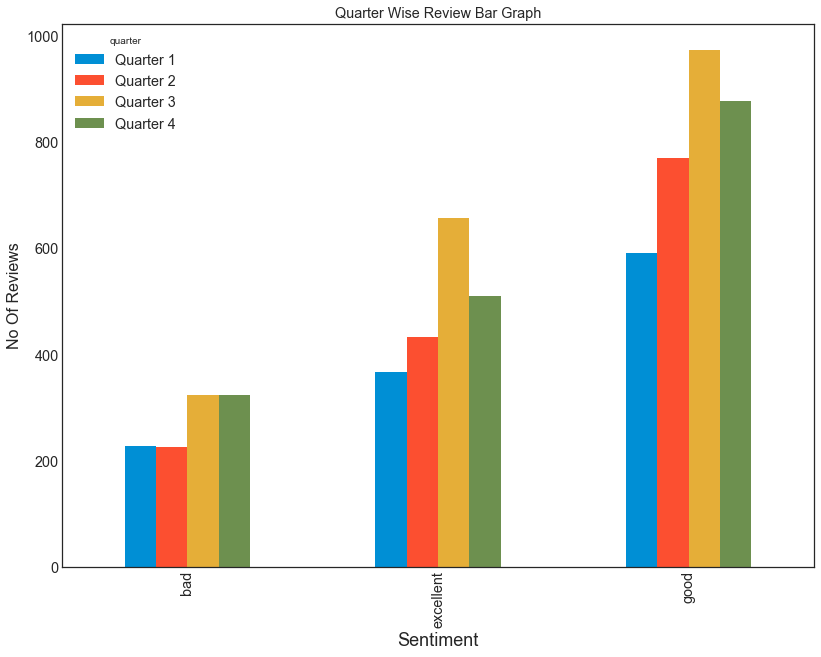

In [54]:
quarterwise_reviews.plot(kind="bar", 
                 figsize=(12,10),
                 stacked=False, title= "Quarter Wise Review Bar Graph" )
plt.xlabel('Sentiment', fontsize=18)
plt.ylabel('No Of Reviews', fontsize=16)

#### Visulising the month wise reviews vs Sentiment

Text(0,0.5,'No Of Reviews')

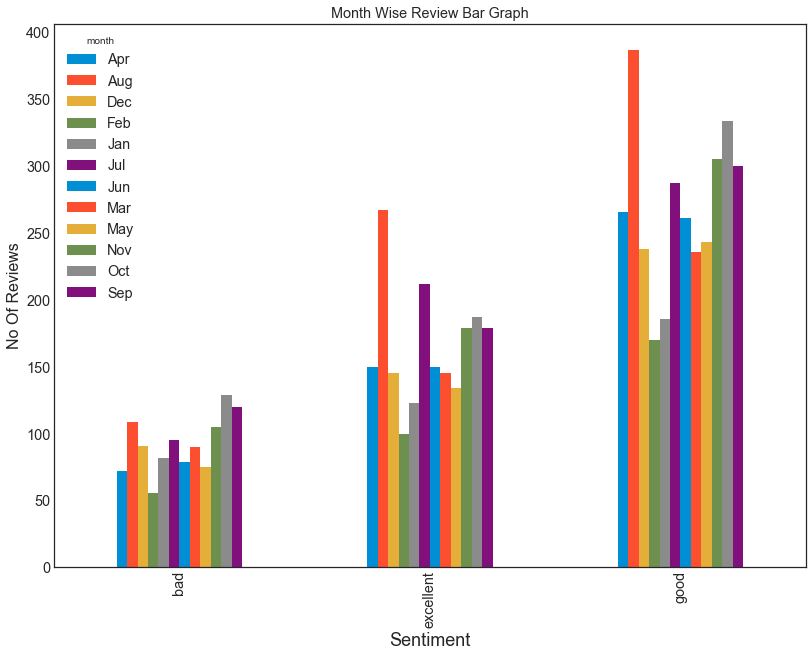

In [55]:
monthwise_reviews.plot(kind="bar", 
                 figsize=(12,10),
                 stacked=False, title= "Month Wise Review Bar Graph" )
plt.xlabel('Sentiment', fontsize=18)
plt.ylabel('No Of Reviews', fontsize=16)

#### From the Quarter Wise Reviews we observed the 3rd Quarter is having more no of reviews

#### Let us seperate Quarter and Month 

In [56]:
quarter_month = pd.crosstab(index=hotels["Sentiment"], 
                             columns=[hotels["quarter"],
                                      hotels["month"]]
                             )   # Include row and column totals

quarter_month

quarter   Quarter 1           Quarter 2           Quarter 3            \
month           Feb  Jan  Mar       Apr  Jun  May       Aug  Jul  Sep   
Sentiment                                                               
bad              56   82   90        72   79   75       109   95  120   
excellent       100  123  145       150  150  134       267  212  179   
good            170  186  236       266  261  243       387  287  300   

quarter   Quarter 4            
month           Dec  Nov  Oct  
Sentiment                      
bad              91  105  129  
excellent       145  179  187  
good            238  305  334

In [62]:
# Pulling out the third Quarter
quarter_month['Quarter 3']

month,Aug,Jul,Sep
Sentiment,,,
bad,109,95,120
excellent,267,212,179
good,387,287,300


In [64]:
high_month = quarter_month['Quarter 3']

Text(0,0.5,'No Of Reviews for 3rd Qaurter')

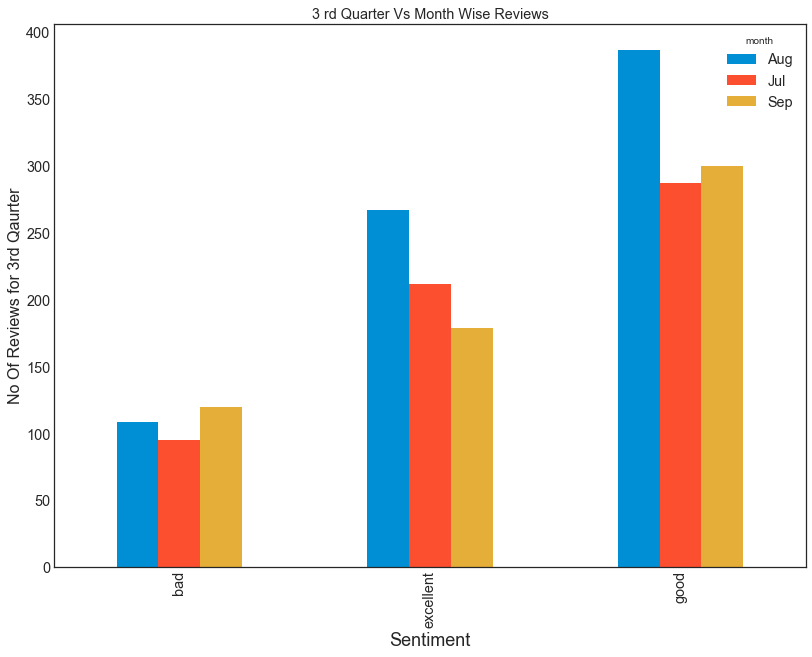

In [65]:
high_month.plot(kind="bar", 
                 figsize=(12,10),
                 stacked=False, title= "3 rd Quarter Vs Month Wise Reviews" )
plt.xlabel('Sentiment', fontsize=18)
plt.ylabel('No Of Reviews for 3rd Qaurter', fontsize=16)

In [67]:
low_month = quarter_month['Quarter 1']

In [68]:
low_month

month,Feb,Jan,Mar
Sentiment,,,
bad,56,82,90
excellent,100,123,145
good,170,186,236


Text(0,0.5,'No Of Reviews for 1st Qaurter')

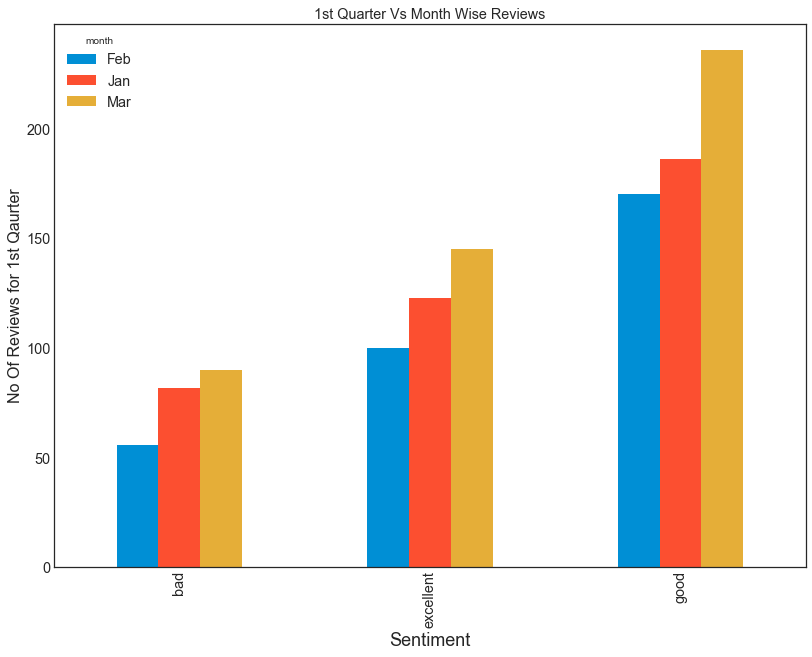

In [69]:
low_month.plot(kind="bar", 
                 figsize=(12,10),
                 stacked=False, title= "1st Quarter Vs Month Wise Reviews" )
plt.xlabel('Sentiment', fontsize=18)
plt.ylabel('No Of Reviews for 1st Qaurter', fontsize=16)

#### Year  Vs Quarter Vs Sentiment

In [70]:
quarter_year = pd.crosstab(index=hotels["Sentiment"], 
                             columns=[hotels["year"],
                                      hotels["quarter"]]
                             )   # Include row and column totals

quarter_year

year           2004                                    2005            \
quarter   Quarter 1 Quarter 2 Quarter 3 Quarter 4 Quarter 1 Quarter 2   
Sentiment                                                               
bad              17        13        15        19        34        34   
excellent        20        39        47        54        70        94   
good             37        58        94        83       114       152   

year                               2006                                \
quarter   Quarter 3 Quarter 4 Quarter 1 Quarter 2 Quarter 3 Quarter 4   
Sentiment                                                               
bad              39        50        57        51       107        99   
excellent       115        63        96        89       178       165   
good            146       129       158       197       302       274   

year           2007                                
quarter   Quarter 1 Quarter 2 Quarter 3 Quarter 4  
Sentiment                                          
bad             120       128       163       157  
excellent       182       212       318       229  
good            283       363       432       391

Text(0,0.5,'No Of Reviews')

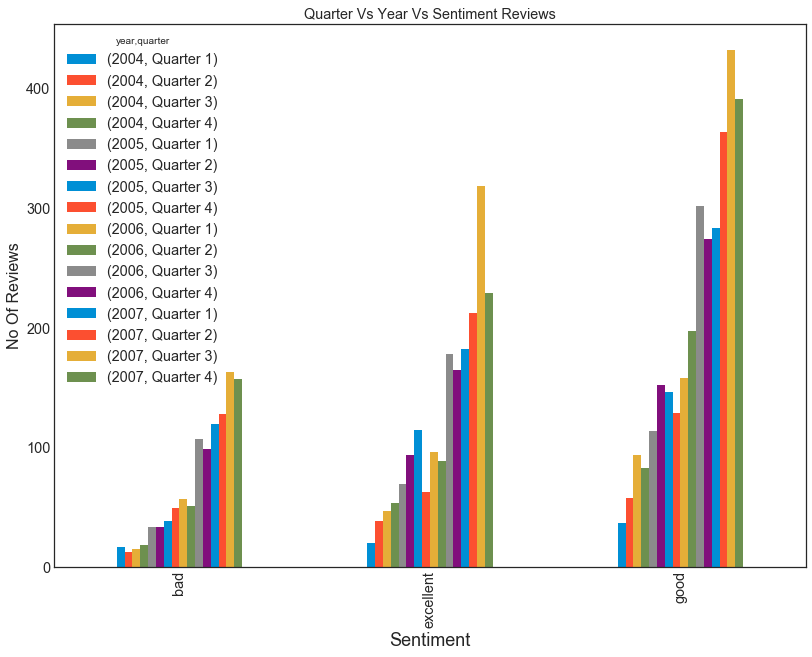

In [71]:
quarter_year.plot(kind="bar", 
                 figsize=(12,10),
                 stacked=False, title= "Quarter Vs Year Vs Sentiment Reviews" )
plt.xlabel('Sentiment', fontsize=18)
plt.ylabel('No Of Reviews', fontsize=16)

In [72]:
quarter_2004 = quarter_year[2004]

Text(0,0.5,'No Of Reviews')

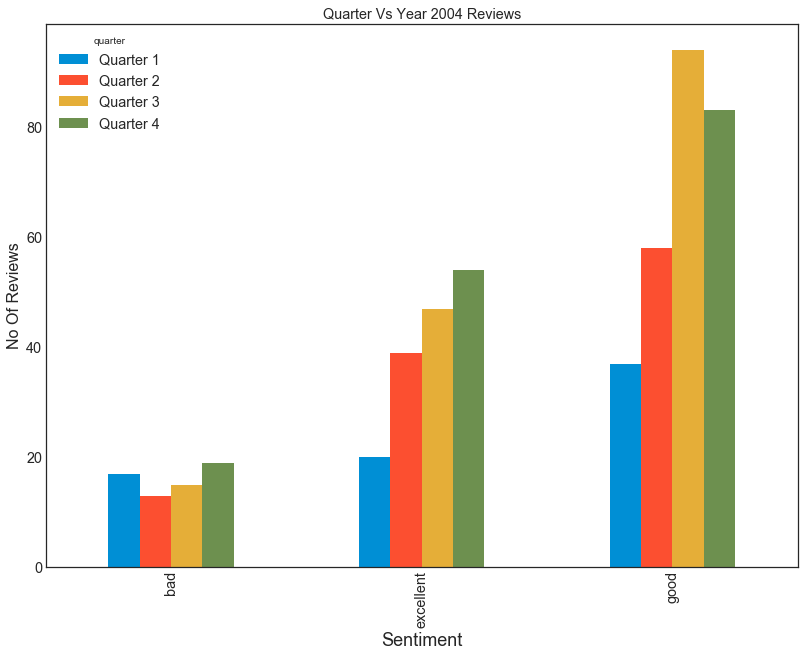

In [73]:
quarter_2004 = quarter_year[2004]
quarter_2004.plot(kind="bar", 
                 figsize=(12,10),
                 stacked=False, title= "Quarter Vs Year 2004 Reviews" )
plt.xlabel('Sentiment', fontsize=18)
plt.ylabel('No Of Reviews', fontsize=16)

### Let us plot all the year wise and Quarter Wise Vs thier Sentiment

Text(0,0.5,'No Of Reviews')

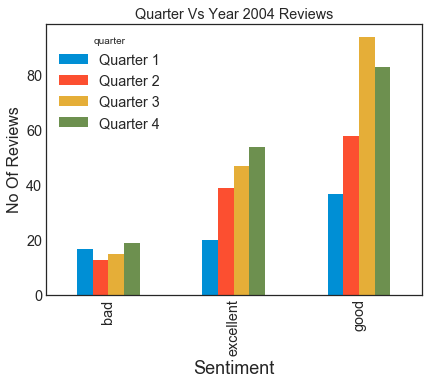

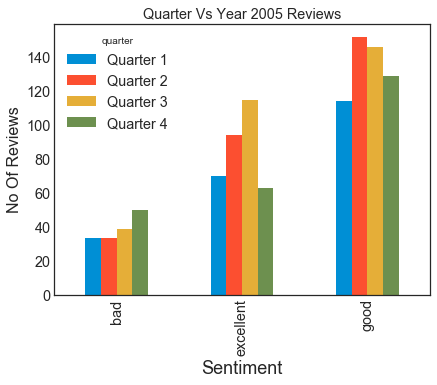

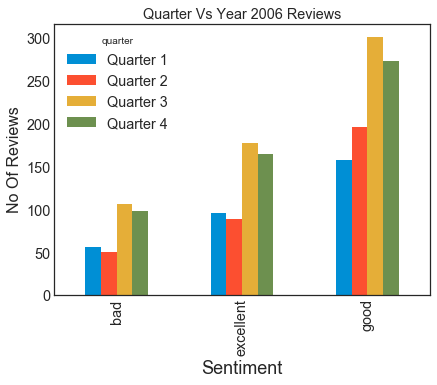

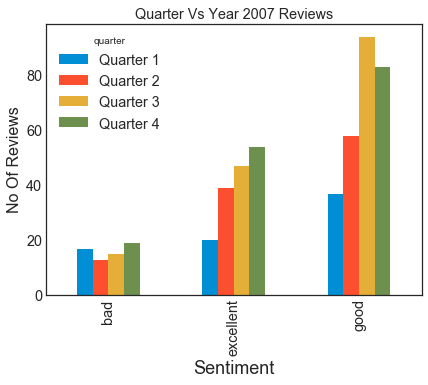

In [74]:
quarter_2004 = quarter_year[2004]
quarter_2004.plot(kind="bar", 
                 figsize=(6,5),
                 stacked=False, title= "Quarter Vs Year 2004 Reviews" )
plt.xlabel('Sentiment', fontsize=18)
plt.ylabel('No Of Reviews', fontsize=16)
plt.subplot


quarter_2005 = quarter_year[2005]
quarter_2005.plot(kind="bar", 
                 figsize=(6,5),
                 stacked=False, title= "Quarter Vs Year 2005 Reviews" )
plt.xlabel('Sentiment', fontsize=18)
plt.ylabel('No Of Reviews', fontsize=16)

quarter_2006 = quarter_year[2006]
quarter_2006.plot(kind="bar", 
                 figsize=(6,5),
                 stacked=False, title= "Quarter Vs Year 2006 Reviews" )
plt.xlabel('Sentiment', fontsize=18)
plt.ylabel('No Of Reviews', fontsize=16)

quarter_2007 = quarter_year[2007]
quarter_2004.plot(kind="bar", 
                 figsize=(6,5),
                 stacked=False, title= "Quarter Vs Year 2007 Reviews" )
plt.xlabel('Sentiment', fontsize=18)
plt.ylabel('No Of Reviews', fontsize=16)

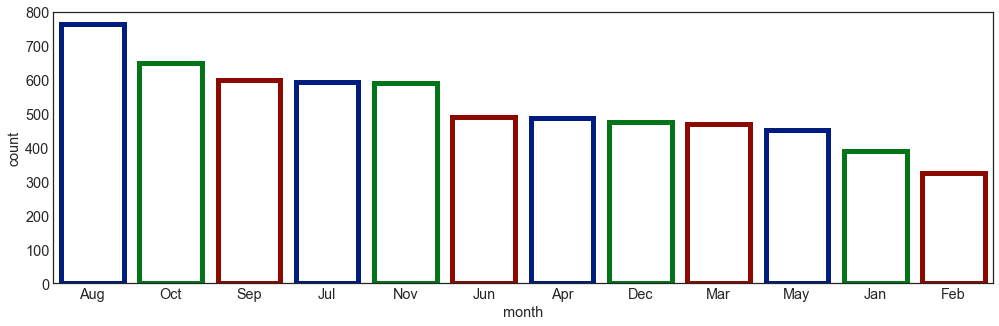

In [75]:
sns.countplot(x='month',data=hotels,facecolor=(0, 0, 0, 0),
                    linewidth=5,
                  edgecolor=sns.color_palette("dark", 3),
             order = hotels['month'].value_counts().index)

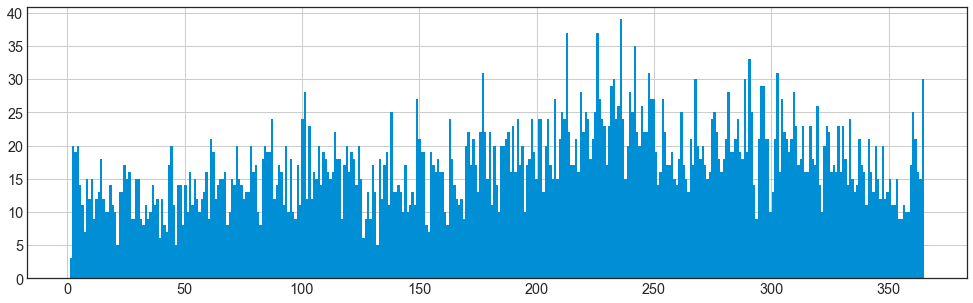

In [76]:
hotels['dayofyear'].hist(bins=365)


### Year 2007, Quarter 3 and August month having High number of reviews <br> Year 2004, Quarter 1 and January are having less no of reviews


#### Year Wise Review Count by Sentiment - Crosstab\nHeatmap Overall Precentage Distribution

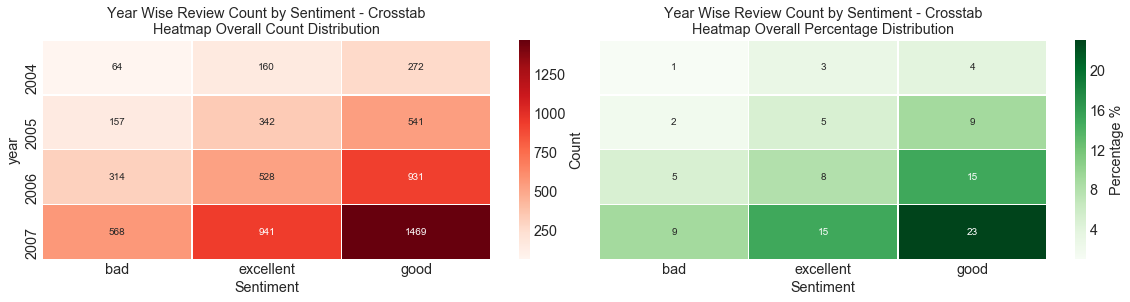

In [77]:
# Heatmaps of Percentage Pivot Table
f, ax = plt.subplots(1,2,figsize=(16, 4), sharey=True)
sns.heatmap(pd.crosstab(hotels['year'], hotels["Sentiment"]),
            annot=True, linewidths=.5, ax = ax[0],fmt='g', cmap="Reds",
                cbar_kws={'label': 'Count'})
ax[0].set_title('Year Wise Review Count by Sentiment - Crosstab\nHeatmap Overall Count Distribution')

sns.heatmap(pd.crosstab(hotels['year'], hotels["Sentiment"], normalize=True).mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1],fmt='g', cmap="Greens",
                cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Year Wise Review Count by Sentiment - Crosstab\nHeatmap Overall Percentage Distribution')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.show()

#### Year Wise Review Count by Sentiment - Crosstab\nHeatmap % Distribution by Index

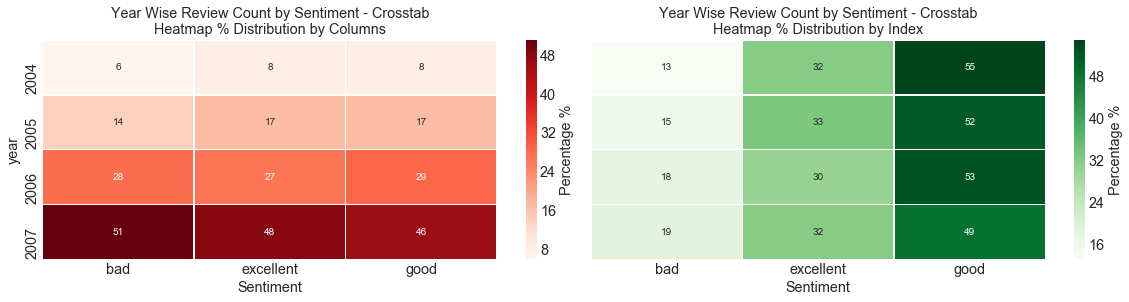

In [78]:
# Heatmaps of Percentage Pivot Table
f, ax = plt.subplots(1,2,figsize=(16, 4), sharey=True)
sns.heatmap(pd.crosstab(hotels['year'], hotels["Sentiment"], normalize='columns').mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[0],fmt='g', cmap="Reds",
                cbar_kws={'label': 'Percentage %'})
ax[0].set_title('Year Wise Review Count by Sentiment - Crosstab\nHeatmap % Distribution by Columns')

sns.heatmap(pd.crosstab(hotels['year'], hotels["Sentiment"], normalize='index').mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1],fmt='g', cmap="Greens",
                cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Year Wise Review Count by Sentiment - Crosstab\nHeatmap % Distribution by Index')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.show()

#### Quarter Wise Review Count by Sentiment - Crosstab\nHeatmap Overall Percentage Distribution

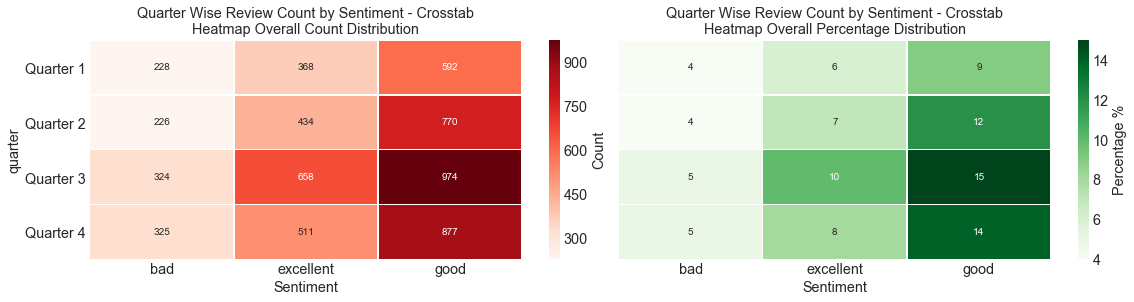

In [79]:
# Heatmaps of Percentage Pivot Table
f, ax = plt.subplots(1,2,figsize=(16, 4), sharey=True)
sns.heatmap(pd.crosstab(hotels['quarter'], hotels["Sentiment"]),
            annot=True, linewidths=.5, ax = ax[0],fmt='g', cmap="Reds",
                cbar_kws={'label': 'Count'})
ax[0].set_title('Quarter Wise Review Count by Sentiment - Crosstab\nHeatmap Overall Count Distribution')

sns.heatmap(pd.crosstab(hotels['quarter'], hotels["Sentiment"], normalize=True).mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1],fmt='g', cmap="Greens",
                cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Quarter Wise Review Count by Sentiment - Crosstab\nHeatmap Overall Percentage Distribution')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.show()

#### Quarter Wise Review Count by Sentiment - Crosstab\nHeatmap % Distribution by Index

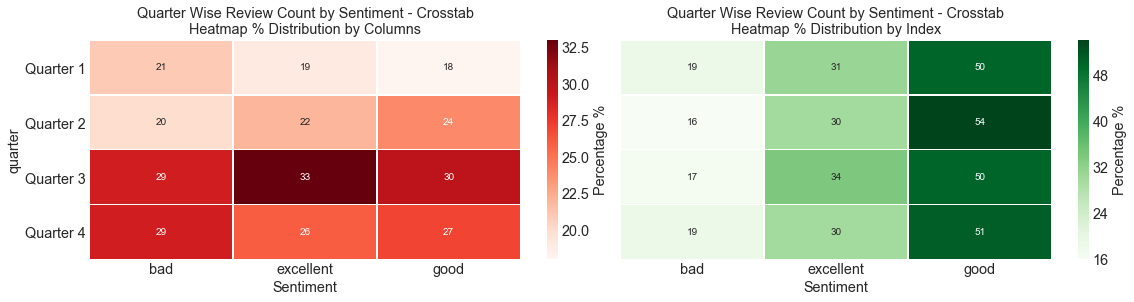

In [80]:
# Heatmaps of Percentage Pivot Table
f, ax = plt.subplots(1,2,figsize=(16, 4), sharey=True)
sns.heatmap(pd.crosstab(hotels['quarter'], hotels["Sentiment"], normalize='columns').mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[0],fmt='g', cmap="Reds",
                cbar_kws={'label': 'Percentage %'})
ax[0].set_title('Quarter Wise Review Count by Sentiment - Crosstab\nHeatmap % Distribution by Columns')

sns.heatmap(pd.crosstab(hotels['quarter'], hotels["Sentiment"], normalize='index').mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1],fmt='g', cmap="Greens",
                cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Quarter Wise Review Count by Sentiment - Crosstab\nHeatmap % Distribution by Index')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.show()

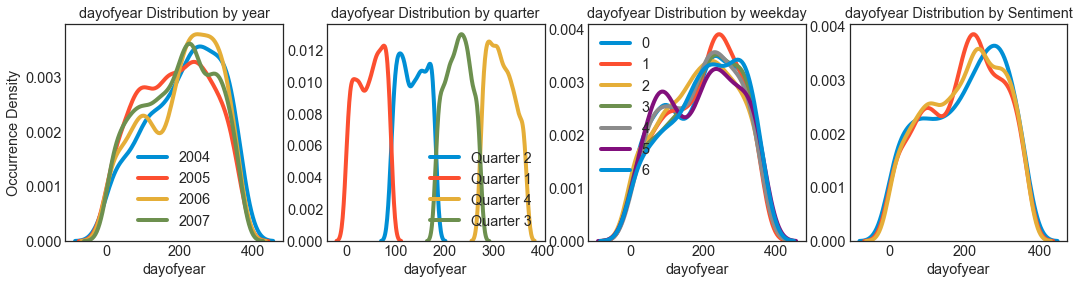

In [81]:
f, axes = plt.subplots(1,4, figsize=(16,4), sharex=False)
xvar = "dayofyear"
plotdf = hotels["dayofyear"]
for i,y in enumerate(["year","quarter", "weekday"]):
    for x in set(hotels[y][hotels[y].notnull()]):
        sns.kdeplot(plotdf[hotels[y]==x], label=x, shade=False, ax=axes[i])
    axes[i].set_xlabel("{}".format(xvar))
    axes[i].set_label('Occurrence Density')
    axes[i].set_title('{} Distribution by {}'.format(xvar, y))

for x in set(hotels["Sentiment"][hotels["Sentiment"].notnull()]):
    sns.kdeplot(plotdf[hotels["Sentiment"]==x], label=x, shade=False, ax=axes[3])

axes[3].legend_.remove()
axes[3].set_xlabel('{}'.format(xvar))
axes[0].set_ylabel('Occurrence Density')
axes[3].set_title('{} Distribution by {}'.format(xvar, "Sentiment"))
plt.show()

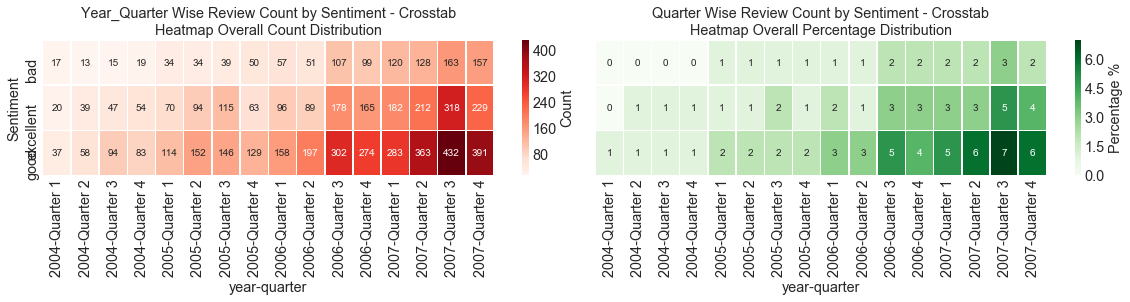

In [82]:
# Heatmaps of Percentage Pivot Table
f, ax = plt.subplots(1,2,figsize=(16, 4), sharey=True)
sns.heatmap(pd.crosstab(index=hotels["Sentiment"], 
                             columns=[hotels["year"],
                                      hotels["quarter"]]),
            annot=True, linewidths=.5, ax = ax[0],fmt='g', cmap="Reds",
                cbar_kws={'label': 'Count'})
ax[0].set_title('Year_Quarter Wise Review Count by Sentiment - Crosstab\nHeatmap Overall Count Distribution')

sns.heatmap(pd.crosstab(index=hotels["Sentiment"], 
                             columns=[hotels["year"],
                                      hotels["quarter"]], normalize=True).mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1],fmt='g', cmap="Greens",
                cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Quarter Wise Review Count by Sentiment - Crosstab\nHeatmap Overall Percentage Distribution')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.show()

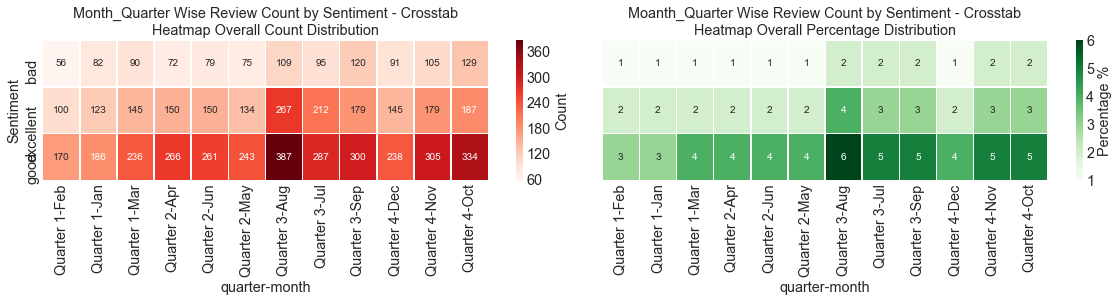

In [83]:
# Heatmaps of Percentage Pivot Table
f, ax = plt.subplots(1,2,figsize=(16, 4), sharey=True)
sns.heatmap(pd.crosstab(index=hotels["Sentiment"], 
                             columns=[hotels["quarter"],
                                      hotels["month"]]),
            annot=True, linewidths=.5, ax = ax[0],fmt='g', cmap="Reds",
                cbar_kws={'label': 'Count'})
ax[0].set_title('Month_Quarter Wise Review Count by Sentiment - Crosstab\nHeatmap Overall Count Distribution')

sns.heatmap(pd.crosstab(index=hotels["Sentiment"], 
                             columns=[hotels["quarter"],
                                      hotels["month"]], normalize=True).mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1],fmt='g', cmap="Greens",
                cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Moanth_Quarter Wise Review Count by Sentiment - Crosstab\nHeatmap Overall Percentage Distribution')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.show()

### Checking the hotel having High Reviews

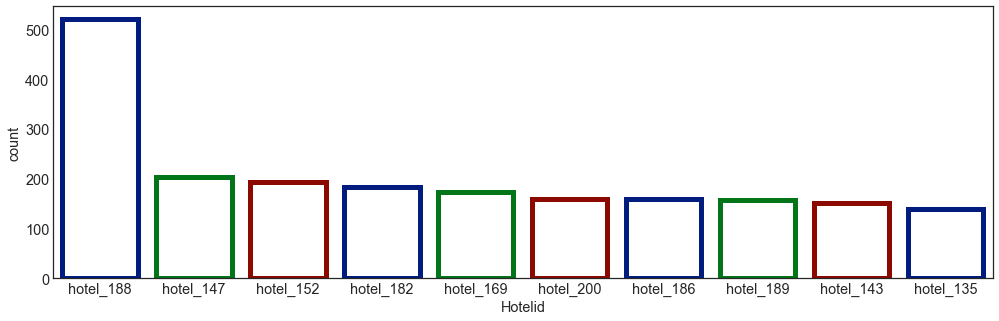

In [84]:
sns.countplot(x='Hotelid',data=hotels,facecolor=(0, 0, 0, 0),
                    linewidth=5,
                  edgecolor=sns.color_palette("dark", 3),
             order = hotels['Hotelid'].value_counts().head(10).index)

#### hotel_188 is having more number of reviews, Lets see hotel_188 Sentiment distribution

In [85]:
hotelid_sentiment = pd.crosstab(index=hotels["Sentiment"], 
                             columns=[hotels["Hotelid"]])   # Include row and column totals

hotelid_sentiment

Hotelid,hotel_101,hotel_102,hotel_103,hotel_104,hotel_105,hotel_106,hotel_107,hotel_108,hotel_109,hotel_110,hotel_111,hotel_112,hotel_113,hotel_114,hotel_115,hotel_116,hotel_117,hotel_118,hotel_119,hotel_120,hotel_121,hotel_122,hotel_123,hotel_124,hotel_125,hotel_126,hotel_127,hotel_128,hotel_129,hotel_130,hotel_131,hotel_132,hotel_133,hotel_134,hotel_135,hotel_136,hotel_137,hotel_138,hotel_139,hotel_140,hotel_141,hotel_142,hotel_143,hotel_144,hotel_145,hotel_146,hotel_147,hotel_148,hotel_149,hotel_150,hotel_151,hotel_152,hotel_153,hotel_154,hotel_155,hotel_156,hotel_157,hotel_158,hotel_159,hotel_160,hotel_161,hotel_162,hotel_163,hotel_164,hotel_165,hotel_166,hotel_167,hotel_168,hotel_169,hotel_170,hotel_171,hotel_172,hotel_173,hotel_174,hotel_175,hotel_176,hotel_177,hotel_178,hotel_179,hotel_180,hotel_181,hotel_182,hotel_183,hotel_184,hotel_185,hotel_186,hotel_187,hotel_188,hotel_189,hotel_190,hotel_191,hotel_192,hotel_193,hotel_194,hotel_195,hotel_196,hotel_197,hotel_198,hotel_199,hotel_200
Sentiment,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bad,5,6,8,10,6,6,3,4,2,6,12,5,3,5,3,8,2,23,6,6,0,4,10,8,2,5,38,12,11,15,22,5,13,36,9,12,8,18,8,6,17,7,23,16,8,18,8,23,9,25,8,54,5,3,18,0,21,13,8,10,14,4,3,9,12,6,14,5,48,22,18,12,5,5,11,9,15,4,5,17,10,39,1,7,5,6,4,38,15,9,0,2,6,12,4,13,10,5,8,6
excellent,6,20,18,11,7,7,5,0,1,2,5,8,3,2,48,1,4,33,1,21,11,17,36,2,0,4,28,17,8,48,0,1,13,4,65,36,5,5,25,1,33,26,45,20,32,55,106,0,15,14,13,44,8,1,3,1,18,21,7,5,12,30,6,16,5,12,0,23,51,5,20,4,29,2,19,17,18,15,3,0,55,38,2,2,2,87,15,239,78,9,9,2,1,16,0,0,1,2,27,103
good,15,37,20,26,17,18,10,5,8,21,6,12,17,11,11,6,12,78,5,26,4,15,54,12,1,16,56,34,23,67,5,15,42,30,65,68,20,47,34,0,85,35,84,67,45,64,89,3,48,72,31,96,28,10,14,5,40,45,23,10,64,55,13,23,19,8,10,28,75,27,39,25,35,7,40,23,45,7,13,10,68,106,0,5,2,66,9,244,64,16,16,8,5,56,7,4,11,17,30,50


In [86]:
hotel_188 = hotelid_sentiment['hotel_188']

In [87]:
hotel_188

Sentiment
bad           38
excellent    239
good         244
Name: hotel_188, dtype: int64

Text(0,0.5,'No Of Reviews')

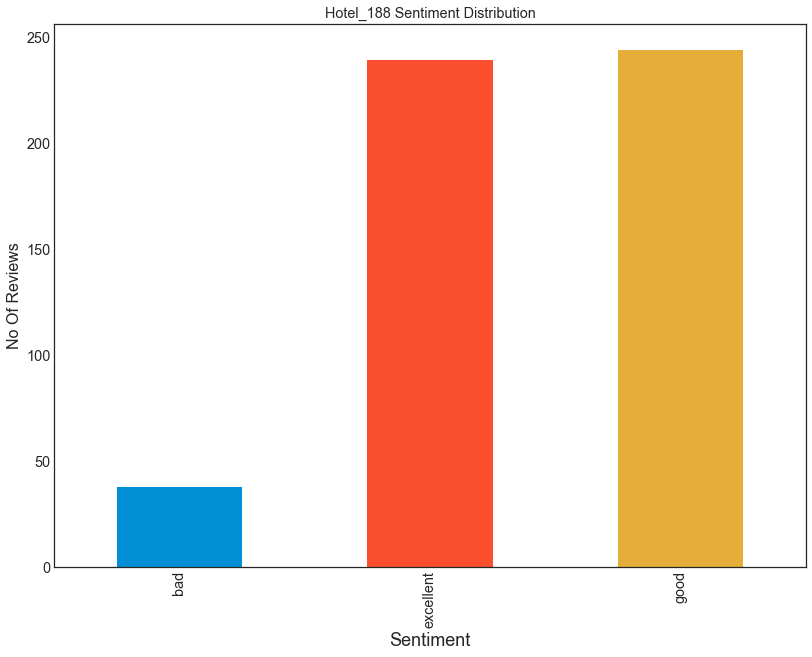

In [88]:
hotel_188.plot(kind="bar", 
                 figsize=(12,10),
                 stacked=False, title= "Hotel_188 Sentiment Distribution" )
plt.xlabel('Sentiment', fontsize=18)
plt.ylabel('No Of Reviews', fontsize=16)

#### hotel_188 having more number of Good and Excellent ratings

### Let us look at the hotelid_188 year wise Sentiment Distribution

In [89]:
hotelid_year_sentiment = pd.crosstab(index=hotels["Sentiment"], 
                             columns=[hotels["Hotelid"],hotels['year']])   # Include row and column totals

hotelid_year_sentiment

Hotelid   hotel_101           hotel_102                hotel_103            \
year           2005 2006 2007      2004 2005 2006 2007      2005 2006 2007   
Sentiment                                                                    
bad               2    1    2         0    1    1    4         1    3    4   
excellent         0    2    4         2    4    4   10         1    8    9   
good              1    4   10         1    2   20   14         7    4    9   

Hotelid   hotel_104                hotel_105                hotel_106       \
year           2004 2005 2006 2007      2004 2005 2006 2007      2004 2005   
Sentiment                                                                    
bad               0    0    4    6         0    3    2    1         0    1   
excellent         0    1    1    9         2    1    0    4         1    2   
good              2    6   10    8         1    4    1   11         0    1   

Hotelid             hotel_107                hotel_108           hotel_109  \
year      2006 2007      2004 2005 2006 2007      2005 2006 2007      2005   
Sentiment                                                                    
bad          3    2         1    0    0    2         1    1    2         0   
excellent    2    2         0    2    0    3         0    0    0         0   
good         8    9         0    5    2    3         1    0    4         2   

Hotelid             hotel_110                hotel_111                 \
year      2006 2007      2004 2005 2006 2007      2004 2005 2006 2007   
Sentiment                                                               
bad          1    1         0    0    3    3         1    1    3    7   
excellent    1    0         0    1    1    0         0    2    1    2   
good         2    4         2    8    5    6         1    1    4    0   

Hotelid   hotel_112                hotel_113                hotel_114       \
year           2004 2005 2006 2007      2004 2005 2006 2007      2004 2005   
Sentiment                                                                    
bad               0    1    2    2         1    0    1    1         1    3   
excellent         0    0    2    6         0    1    1    1         0    1   
good              2    2    5    3         0    0    6   11         2    2   

Hotelid             hotel_115                hotel_116           hotel_117  \
year      2006 2007      2004 2005 2006 2007      2005 2006 2007      2004   
Sentiment                                                                    
bad          0    1         0    0    2    1         1    2    5         0   
excellent    1    0         3    6   14   25         0    1    0         0   
good         4    3         1    1    3    6         0    3    3         1   

Hotelid                  hotel_118                hotel_119                 \
year      2005 2006 2007      2004 2005 2006 2007      2004 2005 2006 2007   
Sentiment                                                                    
bad          0    1    1         1    2   10   10         1    1    1    3   
excellent    4    0    0         1    6    9   17         0    0    1    0   
good         2    3    6        10   14   25   29         1    1    2    1   

Hotelid   hotel_120                hotel_121      hotel_122 hotel_123       \
year           2004 2005 2006 2007      2006 2007      2007      2004 2005   
Sentiment                                                                    
bad               0    0    1    5         0    0         4         3    4   
excellent         0    5    6   10         2    9        17         5    2   
good              3    2    8   13         1    3        15         8   11   

Hotelid             hotel_124                hotel_125 hotel_126            \
year      2006 2007      2004 2005 2006 2007      2007      2004 2005 2006   
Sentiment                                                                    
bad          2    1         0    1    6    1

In [90]:
hotel_188_year = hotelid_year_sentiment['hotel_188']

In [91]:
hotel_188_year

year,2004,2005,2006,2007
Sentiment,,,,
bad,2,5,14,17
excellent,26,64,66,83
good,26,62,67,89


Text(0,0.5,'No Of Reviews')

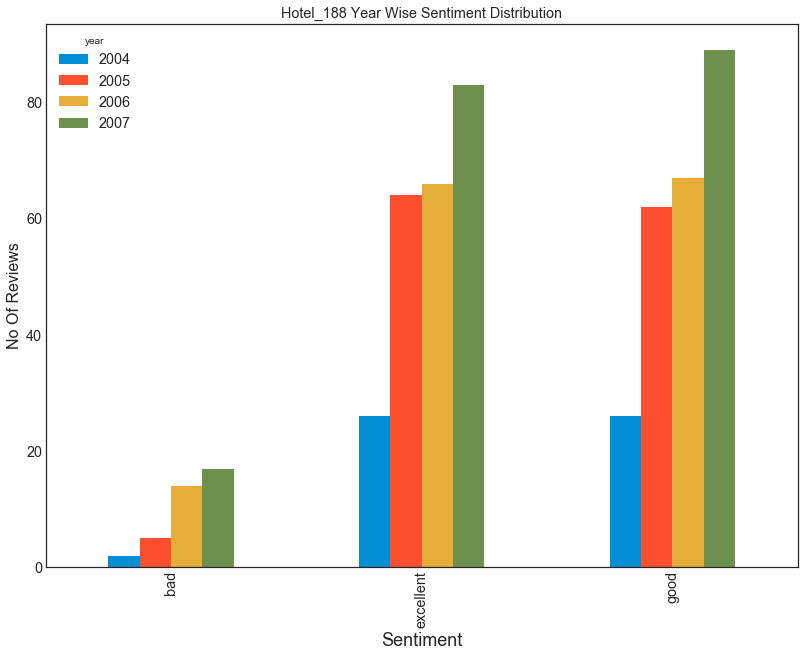

In [92]:
hotel_188_year.plot(kind="bar", 
                 figsize=(12,10),
                 stacked=False, title= "Hotel_188 Year Wise Sentiment Distribution" )
plt.xlabel('Sentiment', fontsize=18)
plt.ylabel('No Of Reviews', fontsize=16)

### Let us look at the hotelid_188 quarter wise Sentiment Distribution

In [93]:
hotelid_quarter_sentiment = pd.crosstab(index=hotels["Sentiment"], 
                             columns=[hotels["Hotelid"],hotels['quarter']])   # Include row and column totals

hotelid_quarter_sentiment

Hotelid   hotel_101                               hotel_102            \
quarter   Quarter 1 Quarter 2 Quarter 3 Quarter 4 Quarter 1 Quarter 2   
Sentiment                                                               
bad               1         2         1         1         1         0   
excellent         2         1         2         1         2         2   
good              1         5         5         4         3        10   

Hotelid                       hotel_103                                \
quarter   Quarter 3 Quarter 4 Quarter 1 Quarter 2 Quarter 3 Quarter 4   
Sentiment                                                               
bad               5         0         2         2         1         3   
excellent        13         3         6         3         3         6   
good             13        11         3         5         5         7   

Hotelid   hotel_104                               hotel_105            \
quarter   Quarter 1 Quarter 2 Quarter 3 Quarter 4 Quarter 1 Quarter 2   
Sentiment                                                               
bad               3         2         1         4         4         0   
excellent         3         1         6         1         1         3   
good             11         5         4         6         6         3   

Hotelid                       hotel_106                                \
quarter   Quarter 3 Quarter 4 Quarter 1 Quarter 2 Quarter 3 Quarter 4   
Sentiment                                                               
bad               1         1         0         1         3         2   
excellent         0         3         1         0         3         3   
good              5         3         4         4         4         6   

Hotelid   hotel_107                               hotel_108            \
quarter   Quarter 1 Quarter 2 Quarter 3 Quarter 4 Quarter 1 Quarter 2   
Sentiment                                                               
bad               1         1         1         0         2         0   
excellent         0         2         3         0         0         0   
good              1         2         3         4         2         2   

Hotelid             hotel_109                     hotel_110            \
quarter   Quarter 4 Quarter 1 Quarter 2 Quarter 4 Quarter 1 Quarter 2   
Sentiment                                                               
bad               2         1         0         1         4         0   
excellent         0         0         1         0         1         0   
good              1         2         5         1         6         6   

Hotelid                       hotel_111                                \
quarter   Quarter 3 Quarter 4 Quarter 1 Quarter 2 Quarter 3 Quarter 4   
Sentiment                                                               
bad               1         1         3         2         3         4   
excellent         1         0         1         3         0         1   
good              4         5         1         3         2         0   

Hotelid   hotel_112                               hotel_113            \
quarter   Quarter 1 Quarter 2 Quarter 3 Quarter 4 Quarter 1 Quarter 2   
Sentiment                                                               
bad               1         0         1         3         1         0   
excellent         1         3         2         2         0         1   
good              3         3         3         3         5         5   

Hotelid                       hotel_114                                \
quarter   Quarter 3 Quarter 4 Quarter 1 Quarter 2 Quarter 3 Quarter 4   
Sentiment                                                               
bad               0         2         2         1         0         2   
excellent         0         2         0         1         0         1   
good              3         4         2         1         4         4   

Hotelid   hotel_115                              

In [94]:
hotel_188_quarter = hotelid_quarter_sentiment['hotel_188']

In [95]:
hotel_188_quarter

quarter,Quarter 1,Quarter 2,Quarter 3,Quarter 4
Sentiment,,,,
bad,9,9,8,12
excellent,54,46,71,68
good,66,65,58,55


Text(0,0.5,'No Of Reviews')

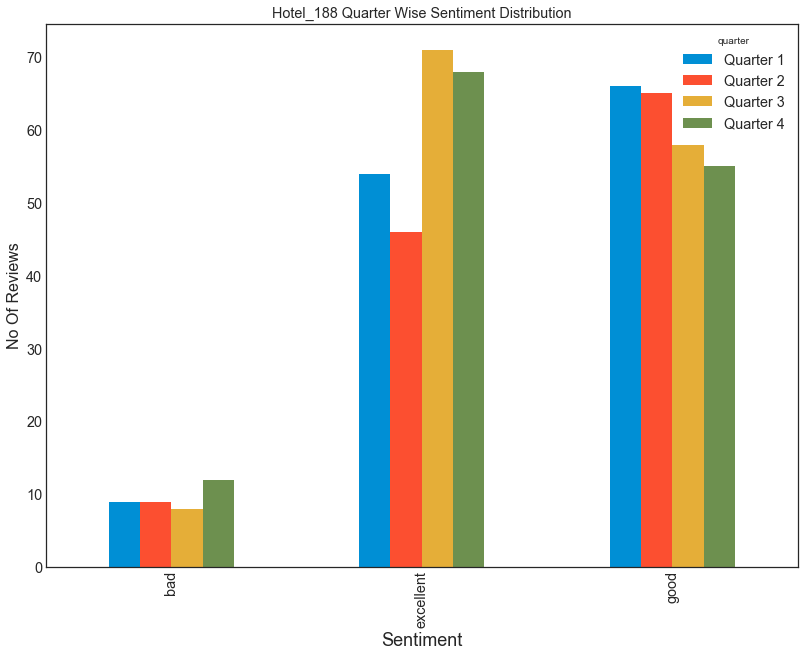

In [96]:
hotel_188_quarter.plot(kind="bar", 
                 figsize=(12,10),
                 stacked=False, title= "Hotel_188 Quarter Wise Sentiment Distribution" )
plt.xlabel('Sentiment', fontsize=18)
plt.ylabel('No Of Reviews', fontsize=16)

#### As compared to overall Sentimnet hotelid_188 is having slightly more or equal no of review in Q3 and Q4 <br> Also good reviews are high in Q1 and Q2 when compared to Q3 and Q4, this is interesting when compared to over sentiment distribution

# Exploring Text and visulaizing to get insights from it

In [123]:
pd.set_option('max_colwidth', 500)

In [131]:
df = hotels

In [133]:
df[["Hotelid","Reviewid","reviewtext", "Sentiment"]].sample(7)

,Hotelid,Reviewid,reviewtext,Sentiment
2139,hotel_143,Review_2140,"Fairly nice hotel - good value. We booked here through priceline as well. The hotel is not in the financial district but on the edge of Chinatown. It is within walking distance to Columbus St, which is where a lot of good restaurants and stuff are. Positives: nice rooms and bathrooms, Crabtree toiletries, fluffy bedding, very clean, good bay view.Negatives: walls very thin - could hear children running up and down the hallway and everything in rooms next to us, parking is $48/night w/ tax. O...",good
5431,hotel_188,Review_5432,"Don't hesitate - go for the Belvedere We took advantage of the NY1 deal offered on the hotel's own website. A king bedded room with breakfast for two (otherwise $ 17 per person) came down to $209. For a double bedded room the same deal only cost $ 189. You won't find many better deals this central in New York City. Clean and quiet rooms, friendly staff, excellent buffet breakfast, three subway stations nearby. The surrounding streets are studded with good places to eat and for those who want...",excellent
3913,hotel_168,Review_3914,"Great for Pre-Cruise Wedding Stay showReview(2459245, 'full');",excellent
1120,hotel_129,Review_1121,"4th stay showReview(1807862, 'full');",good
179,hotel_104,Review_180,"An Oasis showReview(3184217, 'full');",good
2779,hotel_149,Review_2780,"Great Location, Great Staff, Great Rooms The location is great, just 3 or 4 blocks off Union Square and easily accessible from SFO via BART or taxi. The staff was always accommodating and the rooms were very nice. Even a bit large by San Fran standards! The price was also extremely reasonable.The stay was made a bit more enjoyable by the nightly wine and cheese from 4-6. The wine wasn't the best in the region to be sure, but it was a nice way to spend an hour before heading to dinner.Althoug...",excellent
3647,hotel_162,Review_3648,"Nice place, fair value We stayed there in part based on earlier TripAdvisor reviews we read. The place is quite nice and a good value with professional staff. The rooms are reasonably good-size and have a closet that is really a kitchen (you open up the french doors and inside are all the usual kitchen features.We took a room with two queens plus a fold-out sofa and were not overly cramped like in a regular hotel room.The place is clean, quiet, in a great neighborhood-walking distance to tro...",good


In [134]:
df = df[["Hotelid","Reviewid","reviewtext", "Sentiment"]]

In [135]:
df.describe()

,Hotelid,Reviewid,reviewtext,Sentiment
count,6287,6287,6287,6287
unique,100,6287,6287,3
top,hotel_188,Review_983,"Excellent Hotwire ticker to be exact.This hotel was a nice suprise. Very comfortable and as quiet as hotels get in downtown San Francisco. The Parking lot directly adjacnt to the hotel, is safe and cared for 24 hours per day at just $25 per night. This hotel is on the east edge of the Tenderloin but still safe and close to everything that Union Square has to offer (2 blocks to the Powel Street cable car turnaround at Market). The Hotel is European in design, meaning there is enough room to u...",good
freq,521,1,1,3213


In [136]:
df.head()

,Hotelid,Reviewid,reviewtext,Sentiment
0,hotel_101,Review_1,Nice Marriot View of my king bed room,good
1,hotel_101,Review_2,"Good hotel, charges for internet access The Marriott Airport Seattle is a reasonable choice in the Sea-Tac area. I paid about $189 per night. The shuttle is generally quick to and from the airport and I encourage its use rather taxi service which can be very spotty in Seattle. My room was in the second floor but in the back of the hotel such that I had a very long walk no matter which way I took to the room. The interior is nice and check in was very quick.Breakfast was good in the restauran...",good
2,hotel_101,Review_3,"Small but adequate rooms If you have an early morning flight to catch, this is a good choice as it is right at the airport. It has been recently renovated so the rooms are new and clean. The room service was fast and efficient and the food was good. The negatives were that our room was very small and the bathroom was the smallest I've encountered in many years. Hardly room to turn around and I'm a small person. However, the countertops were granite, which was nice. Also there is only one ele...",good
3,hotel_101,Review_4,"Better than average, some noisy rooms I have stayed at this hotel a few times inthe last several months. The first stay was not the best, but the subsequent ones got better, and they have obviously taken some of the notes on the comment cards seriously.The hotel is located near SeaTac with a frequent shuttle. There is a tower, 8-9 floors high, and an atrium area that is about 3-4 floors high. Note, the tower rooms really have no view although some are advertised as having Mt. Rainier views. ...",good
4,hotel_101,Review_5,"Ordinary Although it is highly rated in these reviews, and you pay a premium price compared with other airport hotels, there is nothing special about this hotel other than its proximity to SEATAC. If you are thinking of staying here, pay attention to the Trip Advisor comments about the hideous views of HVAC equipment from the windows on one whole side of the hotel. Although my room was on the top floor of the building, the view looked like an industrial site, just because of all the equipmen...",bad


In [137]:
df.tail()

,Hotelid,Reviewid,reviewtext,Sentiment
6282,hotel_200,Review_6283,"A Very Nice Boutique Hotel Had a recent stay in NYC and stayed in one of their upscale suites. The rooms were clean and the amenities nice. One of the elevators was not working during my stay, so it took forever to get up and down to the lobby. Also requested a bucket of ice which never arrived from room service. The continental breakfast w/ juices was quite enjoyable. Would recommend with some reservations.",good
6283,hotel_200,Review_6284,"My Home in NYC I happened upon the Giraffe in 2001. Since then I (alone or with my wife) have stayed at this beautiful hotel about ten times. Unless omething beyond my control prevents me from taking a room at the Giraffe, this is my home in NYC. When you see the Giraffe I am confident that you will understand my loyalty. The common areas --the lobby (that also serves as the breakfast room in the morning and the location for wine and cheese in the evening (with a piano playeras a bonus)) and...",excellent
6284,hotel_200,Review_6285,Fantastic New York Hotel! My husband and I don't have to stay in New York hotels due to my in-laws nice apartment - however this past weekend it so happened there was no room at that inn so we tried Hotel Giraffe because of the reviews we read on trip advisor. And I'm happy to say our experience was really great! The room are large and extremely clean especially for New York City hotels (we stayed at the Peninsula recently and it wasn't as nice unless you got a very pricey deluxe room). The ...,excellent
6285,hotel_200,Review_6286,"It's our new favorite hotel!! After staying at many New york City Hotels-- including grand old and boutique-- this was by far the best, Our one bedroom suite was spacious for NYC...beautiful decor with a balcony! The staff was consistently friendly, helpful and professional, from reservations to turn-down service. The complimentary food and beverage offerings went beyond the norm as well. Location was great-- and QUIET!! It's the only place we'll stay from now on.",excellent
6286,hotel_200,Review_6287,"Terrific Hotel in the Union Square/Grammercy Park Area The Hotel Giraffe is a very, very good hotel in an area where there are relatively few hotels. The location was just about perfect for my visit--I needed to be near my friends @ the W Union Square. The hotel is immaculately maintained. The lobby is extremely spacious for a relatively small hotel, and the decor/furninshings are tasteful, comfortable, and welcoming. The staff are, for the most part, excellent, though I did encounter one be...",excellent


#### Cleaning the data using few regular expressions

In [138]:
def standardize_text(df, text_field):
    df[text_field] = df[text_field].str.replace(r"http\S+", "")
    df[text_field] = df[text_field].str.replace(r"http", "")
    df[text_field] = df[text_field].str.replace(r"@\S+", "")
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\!!\!!!\"\_\n]", " ")
    df[text_field] = df[text_field].str.replace(r"@", "at")
    df[text_field] = df[text_field].str.replace(r"$", "")
    df[text_field] = df[text_field].str.lower()
    return df


In [139]:
df = standardize_text(df, "reviewtext")

C:\Users\Gnanendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [140]:
df.head()

,Hotelid,Reviewid,reviewtext,Sentiment
0,hotel_101,Review_1,nice marriot view of my king bed room,good
1,hotel_101,Review_2,"good hotel, charges for internet access the marriott airport seattle is a reasonable choice in the sea tac area i paid about 189 per night the shuttle is generally quick to and from the airport and i encourage its use rather taxi service which can be very spotty in seattle my room was in the second floor but in the back of the hotel such that i had a very long walk no matter which way i took to the room the interior is nice and check in was very quick breakfast was good in the restauran...",good
2,hotel_101,Review_3,"small but adequate rooms if you have an early morning flight to catch, this is a good choice as it is right at the airport it has been recently renovated so the rooms are new and clean the room service was fast and efficient and the food was good the negatives were that our room was very small and the bathroom was the smallest i've encountered in many years hardly room to turn around and i'm a small person however, the countertops were granite, which was nice also there is only one ele...",good
3,hotel_101,Review_4,"better than average, some noisy rooms i have stayed at this hotel a few times inthe last several months the first stay was not the best, but the subsequent ones got better, and they have obviously taken some of the notes on the comment cards seriously the hotel is located near seatac with a frequent shuttle there is a tower, 8 9 floors high, and an atrium area that is about 3 4 floors high note, the tower rooms really have no view although some are advertised as having mt rainier views ...",good
4,hotel_101,Review_5,"ordinary although it is highly rated in these reviews, and you pay a premium price compared with other airport hotels, there is nothing special about this hotel other than its proximity to seatac if you are thinking of staying here, pay attention to the trip advisor comments about the hideous views of hvac equipment from the windows on one whole side of the hotel although my room was on the top floor of the building, the view looked like an industrial site, just because of all the equipmen...",bad


In [141]:
df.tail()

,Hotelid,Reviewid,reviewtext,Sentiment
6282,hotel_200,Review_6283,"a very nice boutique hotel had a recent stay in nyc and stayed in one of their upscale suites the rooms were clean and the amenities nice one of the elevators was not working during my stay, so it took forever to get up and down to the lobby also requested a bucket of ice which never arrived from room service the continental breakfast w juices was quite enjoyable would recommend with some reservations",good
6283,hotel_200,Review_6284,"my home in nyc i happened upon the giraffe in 2001 since then i (alone or with my wife) have stayed at this beautiful hotel about ten times unless omething beyond my control prevents me from taking a room at the giraffe, this is my home in nyc when you see the giraffe i am confident that you will understand my loyalty the common areas the lobby (that also serves as the breakfast room in the morning and the location for wine and cheese in the evening (with a piano playeras a bonus)) and...",excellent
6284,hotel_200,Review_6285,fantastic new york hotel! my husband and i don't have to stay in new york hotels due to my in laws nice apartment however this past weekend it so happened there was no room at that inn so we tried hotel giraffe because of the reviews we read on trip advisor and i'm happy to say our experience was really great! the room are large and extremely clean especially for new york city hotels (we stayed at the peninsula recently and it wasn't as nice unless you got a very pricey deluxe room) the ...,excellent
6285,hotel_200,Review_6286,"it's our new favorite hotel!! after staying at many new york city hotels including grand old and boutique this was by far the best, our one bedroom suite was spacious for nyc beautiful decor with a balcony! the staff was consistently friendly, helpful and professional, from reservations to turn down service the complimentary food and beverage offerings went beyond the norm as well location was great and quiet!! it's the only place we'll stay from now on",excellent
6286,hotel_200,Review_6287,"terrific hotel in the union square grammercy park area the hotel giraffe is a very, very good hotel in an area where there are relatively few hotels the location was just about perfect for my visit i needed to be near my friends at the w union square the hotel is immaculately maintained the lobby is extremely spacious for a relatively small hotel, and the decor furninshings are tasteful, comfortable, and welcoming the staff are, for the most part, excellent, though i did encounter one b...",excellent


In [142]:
df.describe()

,Hotelid,Reviewid,reviewtext,Sentiment
count,6287,6287,6287,6287
unique,100,6287,6287,3
top,hotel_188,Review_983,"real value for money we stayed here for 3 nights in may and can highly recommend this motel to people who want a central base from which to explore sf okay so this motel doesn't have all the fancy amenities of a posh hotel but who cares the rooms have been recently refurbished and were comfortable and clean the 2 owners were particularly helpful, including giving us clear instructions on which areas of sf were safe and which were not, providing us with a map and showing us which place...",good
freq,521,1,1,3213


### Removing punctions

In [144]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [145]:
df['reviewtext'] = df['reviewtext'].apply(remove_punctuation)
df.tail()

C:\Users\Gnanendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Hotelid,Reviewid,reviewtext,Sentiment
6282,hotel_200,Review_6283,a very nice boutique hotel had a recent stay in nyc and stayed in one of their upscale suites the rooms were clean and the amenities nice one of the elevators was not working during my stay so it took forever to get up and down to the lobby also requested a bucket of ice which never arrived from room service the continental breakfast w juices was quite enjoyable would recommend with some reservations,good
6283,hotel_200,Review_6284,my home in nyc i happened upon the giraffe in 2001 since then i alone or with my wife have stayed at this beautiful hotel about ten times unless omething beyond my control prevents me from taking a room at the giraffe this is my home in nyc when you see the giraffe i am confident that you will understand my loyalty the common areas the lobby that also serves as the breakfast room in the morning and the location for wine and cheese in the evening with a piano playeras a bonus and the pa...,excellent
6284,hotel_200,Review_6285,fantastic new york hotel my husband and i dont have to stay in new york hotels due to my in laws nice apartment however this past weekend it so happened there was no room at that inn so we tried hotel giraffe because of the reviews we read on trip advisor and im happy to say our experience was really great the room are large and extremely clean especially for new york city hotels we stayed at the peninsula recently and it wasnt as nice unless you got a very pricey deluxe room the service...,excellent
6285,hotel_200,Review_6286,its our new favorite hotel after staying at many new york city hotels including grand old and boutique this was by far the best our one bedroom suite was spacious for nyc beautiful decor with a balcony the staff was consistently friendly helpful and professional from reservations to turn down service the complimentary food and beverage offerings went beyond the norm as well location was great and quiet its the only place well stay from now on,excellent
6286,hotel_200,Review_6287,terrific hotel in the union square grammercy park area the hotel giraffe is a very very good hotel in an area where there are relatively few hotels the location was just about perfect for my visit i needed to be near my friends at the w union square the hotel is immaculately maintained the lobby is extremely spacious for a relatively small hotel and the decor furninshings are tasteful comfortable and welcoming the staff are for the most part excellent though i did encounter one bellman ...,excellent


#### Saving the cleaned data to disk for future reference

In [146]:
df.to_csv("df_clean_data.csv")

In [147]:
df.groupby("Sentiment").count()

,Hotelid,Reviewid,reviewtext
Sentiment,,,
bad,1103,1103,1103
excellent,1971,1971,1971
good,3213,3213,3213


#### Without removing stop words

In [148]:
text = " ".join(review for review in df.reviewtext)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 5685811 words in the combination of all review.


#### Visualizing the most frequent words using word cloud

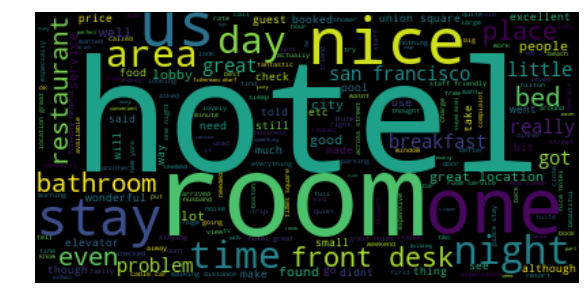

In [149]:
wordcloud = WordCloud(background_color="Black").generate(text)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.title ="Most Frequent Words in all the Review Text"
plt.axis("off")
plt.show()

#### Seperating the Text for Different Sentiments and Visulaizing the most frequent words for each Sentiment

In [150]:
excellent = " ".join(review for review in df[df["Sentiment"]=="excellent"].reviewtext)
good = " ".join(review for review in df[df["Sentiment"]=="good"].reviewtext)
bad = " ".join(review for review in df[df["Sentiment"]=="bad"].reviewtext)

#### Word Cloud for excellent

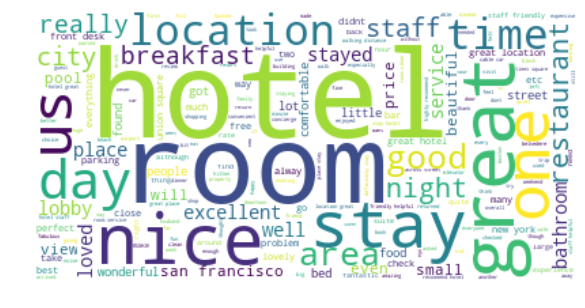

In [152]:
wordcloud_excellent = WordCloud(background_color="white").generate(excellent)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud_excellent, interpolation='bilinear')
plt.title ="Most Frequent Words in the Excellent Review Text"
plt.axis("off")
plt.show()

#### Word Cloud for good

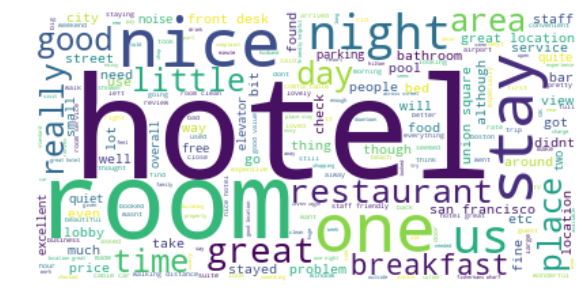

In [153]:
wordcloud_good = WordCloud( background_color="white").generate(good)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud_good, interpolation='bilinear')
plt.title ="Most Frequent Words in the Good Review Text"
plt.axis("off")
plt.show()

#### Word Cloud for Bad

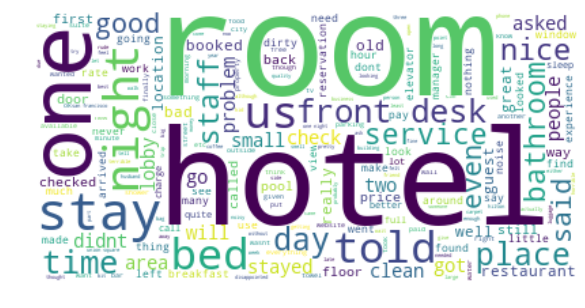

In [154]:
wordcloud_bad = WordCloud(background_color="white").generate(bad)
plt.imshow(wordcloud_bad, interpolation='bilinear')
plt.title ="Most Frequent Words in the Bad Review Text"
plt.axis("off")
plt.show()

#### Removing Stop Words

In [155]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

C:\Users\Gnanendra\Anaconda3\lib\site-packages\nltk\corpus\reader\wordlist.py:28: ResourceWarning: unclosed file <_io.BufferedReader name='C:\\Users\\Gnanendra\\AppData\\Roaming\\nltk_data\\corpora\\stopwords\\english'>
  return concat([self.open(f).read() for f in fileids])


array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [157]:
print("Number of stopwords: ", len(sw))

Number of stopwords:  179


In [156]:
df.tail()

,Hotelid,Reviewid,reviewtext,Sentiment
6282,hotel_200,Review_6283,a very nice boutique hotel had a recent stay in nyc and stayed in one of their upscale suites the rooms were clean and the amenities nice one of the elevators was not working during my stay so it took forever to get up and down to the lobby also requested a bucket of ice which never arrived from room service the continental breakfast w juices was quite enjoyable would recommend with some reservations,good
6283,hotel_200,Review_6284,my home in nyc i happened upon the giraffe in 2001 since then i alone or with my wife have stayed at this beautiful hotel about ten times unless omething beyond my control prevents me from taking a room at the giraffe this is my home in nyc when you see the giraffe i am confident that you will understand my loyalty the common areas the lobby that also serves as the breakfast room in the morning and the location for wine and cheese in the evening with a piano playeras a bonus and the pa...,excellent
6284,hotel_200,Review_6285,fantastic new york hotel my husband and i dont have to stay in new york hotels due to my in laws nice apartment however this past weekend it so happened there was no room at that inn so we tried hotel giraffe because of the reviews we read on trip advisor and im happy to say our experience was really great the room are large and extremely clean especially for new york city hotels we stayed at the peninsula recently and it wasnt as nice unless you got a very pricey deluxe room the service...,excellent
6285,hotel_200,Review_6286,its our new favorite hotel after staying at many new york city hotels including grand old and boutique this was by far the best our one bedroom suite was spacious for nyc beautiful decor with a balcony the staff was consistently friendly helpful and professional from reservations to turn down service the complimentary food and beverage offerings went beyond the norm as well location was great and quiet its the only place well stay from now on,excellent
6286,hotel_200,Review_6287,terrific hotel in the union square grammercy park area the hotel giraffe is a very very good hotel in an area where there are relatively few hotels the location was just about perfect for my visit i needed to be near my friends at the w union square the hotel is immaculately maintained the lobby is extremely spacious for a relatively small hotel and the decor furninshings are tasteful comfortable and welcoming the staff are for the most part excellent though i did encounter one bellman ...,excellent


In [158]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [159]:
df['reviewtext'] = df['reviewtext'].apply(stopwords)
df.tail()

C:\Users\Gnanendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Hotelid,Reviewid,reviewtext,Sentiment
6282,hotel_200,Review_6283,nice boutique hotel recent stay nyc stayed one upscale suites rooms clean amenities nice one elevators working stay took forever get lobby also requested bucket ice never arrived room service continental breakfast w juices quite enjoyable would recommend reservations,good
6283,hotel_200,Review_6284,home nyc happened upon giraffe 2001 since alone wife stayed beautiful hotel ten times unless omething beyond control prevents taking room giraffe home nyc see giraffe confident understand loyalty common areas lobby also serves breakfast room morning location wine cheese evening piano playeras bonus patio twelfth floor lovely rooms suites generous sizes feel even larger due theten foot ceilings staff attentive helpful rose revicki director sales marketing especially stands quibble minor perha...,excellent
6284,hotel_200,Review_6285,fantastic new york hotel husband dont stay new york hotels due laws nice apartment however past weekend happened room inn tried hotel giraffe reviews read trip advisor im happy say experience really great room large extremely clean especially new york city hotels stayed peninsula recently wasnt nice unless got pricey deluxe room service friendly day complimentary coffee fresh fruit snacks nice bonus hotel pretty roof garden takes snacks drinks relax summer free breakfast comfortable lounge y...,excellent
6285,hotel_200,Review_6286,new favorite hotel staying many new york city hotels including grand old boutique far best one bedroom suite spacious nyc beautiful decor balcony staff consistently friendly helpful professional reservations turn service complimentary food beverage offerings went beyond norm well location great quiet place well stay,excellent
6286,hotel_200,Review_6287,terrific hotel union square grammercy park area hotel giraffe good hotel area relatively hotels location perfect visit needed near friends w union square hotel immaculately maintained lobby extremely spacious relatively small hotel decor furninshings tasteful comfortable welcoming staff part excellent though encounter one bellman one maid subpar room nicely appointed really enjoyed balcony room although huge definitely big enough needs particularly liked creative subtle use color decor schem...,excellent


In [161]:
text_afterstop = " ".join(review for review in df.reviewtext)
print ("There are {} words in the combination of all review after stop words removal.".format(len(text_afterstop)))

There are 3659875 words in the combination of all review after stop words removal.


#### There are few words appearing more no of times in all the sentiment classes whcih actually do not contribute to Sentiment class. Updating the stop words list with those most repeating words

In [190]:
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['hotel','one','us','stay','day','us','night','also','room', 'rooms']
stopwords.extend(newStopWords)

C:\Users\Gnanendra\Anaconda3\lib\site-packages\nltk\corpus\reader\wordlist.py:28: ResourceWarning: unclosed file <_io.BufferedReader name='C:\\Users\\Gnanendra\\AppData\\Roaming\\nltk_data\\corpora\\stopwords\\english'>
  return concat([self.open(f).read() for f in fileids])


In [191]:
print("Number of new stopwords: ", len(stopwords))

Number of new stopwords:  189


In [192]:
df['reviewtext'] = df['reviewtext'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))
df.tail()

C:\Users\Gnanendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Hotelid,Reviewid,reviewtext,Sentiment,tokens
6282,hotel_200,Review_6283,nice boutique recent nyc stayed upscale suites clean amenities nice elevators working took forever get lobby requested bucket ice never arrived service continental breakfast w juices quite enjoyable recommend reservations,good,"[nice, boutique, recent, nyc, stayed, upscale, suites, rooms, clean, amenities, nice, elevators, working, took, forever, get, lobby, requested, bucket, ice, never, arrived, service, continental, breakfast, w, juices, quite, enjoyable, recommend, reservations]"
6283,hotel_200,Review_6284,home nyc happened upon giraffe 2001 since alone wife stayed beautiful ten times unless omething beyond control prevents taking giraffe home nyc see giraffe confident understand loyalty common areas lobby serves breakfast morning location wine cheese evening piano playeras bonus patio twelfth floor lovely suites generous sizes feel even larger due theten foot ceilings staff attentive helpful rose revicki director sales marketing especially stands quibble minor perhaps giraffe next technology ...,excellent,"[home, nyc, happened, upon, giraffe, 2001, since, alone, wife, stayed, beautiful, ten, times, unless, omething, beyond, control, prevents, taking, giraffe, home, nyc, see, giraffe, confident, understand, loyalty, common, areas, lobby, serves, breakfast, morning, location, wine, cheese, evening, piano, playeras, bonus, patio, twelfth, floor, lovely, rooms, suites, generous, sizes, feel, even, larger, due, theten, foot, ceilings, staff, attentive, helpful, rose, revicki, director, sales, marke..."
6284,hotel_200,Review_6285,fantastic new york husband dont new york hotels due laws nice apartment however past weekend happened inn tried giraffe reviews read trip advisor im happy say experience really great large extremely clean especially new york city hotels stayed peninsula recently wasnt nice unless got pricey deluxe service friendly complimentary coffee fresh fruit snacks nice bonus pretty roof garden takes snacks drinks relax summer free breakfast comfortable lounge yet another added lovely suprise someone sp...,excellent,"[fantastic, new, york, husband, dont, new, york, hotels, due, laws, nice, apartment, however, past, weekend, happened, inn, tried, giraffe, reviews, read, trip, advisor, im, happy, say, experience, really, great, large, extremely, clean, especially, new, york, city, hotels, stayed, peninsula, recently, wasnt, nice, unless, got, pricey, deluxe, service, friendly, complimentary, coffee, fresh, fruit, snacks, nice, bonus, pretty, roof, garden, takes, snacks, drinks, relax, summer, free, breakfa..."
6285,hotel_200,Review_6286,new favorite staying many new york city hotels including grand old boutique far best bedroom suite spacious nyc beautiful decor balcony staff consistently friendly helpful professional reservations turn service complimentary food beverage offerings went beyond norm well location great quiet place well,excellent,"[new, favorite, staying, many, new, york, city, hotels, including, grand, old, boutique, far, best, bedroom, suite, spacious, nyc, beautiful, decor, balcony, staff, consistently, friendly, helpful, professional, reservations, turn, service, complimentary, food, beverage, offerings, went, beyond, norm, well, location, great, quiet, place, well]"
6286,hotel_200,Review_6287,terrific union square grammercy park area giraffe good area relatively hotels location perfect visit needed near friends w union square immaculately maintained lobby extremely spacious relatively small decor furninshings tasteful comfortable welcoming staff part excellent though encounter bellman maid subpar nicely appointed really enjoyed balcony although huge definitely big enough needs particularly liked creative subtle use color decor scheme offers wonderful little perks many hotels leve...,excellent,"[terrific, union, square, grammercy, park, area, giraffe, good, area, relatively, hotels, location, perfect, visit, needed, near, frie

In [193]:
text_afternewstop = " ".join(review for review in df.reviewtext)
print ("There are {} words in the combination of all review after new stop words removal.".format(len(text_afternewstop)))

There are 3402483 words in the combination of all review after new stop words removal.


#### Checking the most frequnt occuring words

In [194]:
freq = pd.Series(' '.join(df['reviewtext']).split()).value_counts()[:10]
freq

great       6046
location    3988
good        3831
staff       3646
nice        3531
stayed      2995
clean       2626
get         2356
service     2335
time        2100
dtype: int64

In [195]:
df.head()

,Hotelid,Reviewid,reviewtext,Sentiment,tokens
0,hotel_101,Review_1,nice marriot view king bed,good,"[nice, marriot, view, king, bed]"
1,hotel_101,Review_2,good charges internet access marriott airport seattle reasonable choice sea tac area paid 189 per shuttle generally quick airport encourage use rather taxi service spotty seattle second floor back long walk matter way took interior nice check quick breakfast good restaurant bit pricey drink service bar fine complaints imagine must get noisy lobby crowd hanging thebar guess marriott new program guests charged internet service 9 95 free business center near check counters two internet pcs boar...,good,"[good, charges, internet, access, marriott, airport, seattle, reasonable, choice, sea, tac, area, paid, 189, per, shuttle, generally, quick, airport, encourage, use, rather, taxi, service, spotty, seattle, second, floor, back, long, walk, matter, way, took, interior, nice, check, quick, breakfast, good, restaurant, bit, pricey, drink, service, bar, fine, complaints, imagine, must, get, noisy, lobby, crowd, hanging, thebar, guess, marriott, new, program, guests, charged, internet, service, 9,..."
2,hotel_101,Review_3,small adequate early morning flight catch good choice right airport recently renovated new clean service fast efficient food good negatives small bathroom smallest ive encountered many years hardly turn around im small person however countertops granite nice elevator seemed odd size may self park valet park fee recommend extended fine visit,good,"[small, adequate, rooms, early, morning, flight, catch, good, choice, right, airport, recently, renovated, rooms, new, clean, service, fast, efficient, food, good, negatives, small, bathroom, smallest, ive, encountered, many, years, hardly, turn, around, im, small, person, however, countertops, granite, nice, elevator, seemed, odd, size, may, self, park, valet, park, fee, recommend, extended, fine, visit]"
3,hotel_101,Review_4,better average noisy stayed times inthe last several months first best subsequent ones got better obviously taken notes comment cards seriously located near seatac frequent shuttle tower 8 9 floors high atrium area 3 4 floors high note tower really view although advertised mt rainier views maybe trees grew regardless tower youwill looking roof ventilation roof associate entrance avoid ending x16 x18 bit noisy trucks show odd numbered tower little noisy ac frankly wasnt badthe bathrooms small...,good,"[better, average, noisy, rooms, stayed, times, inthe, last, several, months, first, best, subsequent, ones, got, better, obviously, taken, notes, comment, cards, seriously, located, near, seatac, frequent, shuttle, tower, 8, 9, floors, high, atrium, area, 3, 4, floors, high, note, tower, rooms, really, view, although, advertised, mt, rainier, views, maybe, trees, grew, regardless, tower, youwill, looking, roof, ventilation, roof, associate, entrance, avoid, rooms, ending, x16, x18, bit, nois..."
4,hotel_101,Review_5,ordinary although highly rated reviews pay premium price compared airport hotels nothing special proximity seatac thinking staying pay attention trip advisor comments hideous views hvac equipment windows whole side although top floor building view looked like industrial site equipment roof lower wing building spacious bed comfortable bathroom functional rainstorm middle ceiling leaked club lounge paid extra modest ive ever seen good food breakfast best part experience restaurant extremely or...,bad,"[ordinary, although, highly, rated, reviews, pay, premium, price, compared, airport, hotels, nothing, special, proximity, seatac, thinking, staying, pay, attention, trip, advisor, comments, hideous, views, hvac, equipment, windows, whole, side, although, top, floor, building, view, looked, like, industrial, site, equipment, roof, lower, wing, building, spacious, bed, comfortable, bathroom, functional, rainstorm, middle, ceiling, leaked, club, lounge, paid, extra, modest, ive, ever, seen, goo..."


### Spelling Correction

In [196]:
#! pip install TextBlob

In [197]:
#df['reviewtext'] = df['reviewtext'].apply(lambda x: str(TextBlob(x).correct()))

In [183]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
df["tokens"] = df["reviewtext"].apply(tokenizer.tokenize)
df.head()

C:\Users\Gnanendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Hotelid,Reviewid,reviewtext,Sentiment,tokens
0,hotel_101,Review_1,nice marriot view king bed,good,"[nice, marriot, view, king, bed]"
1,hotel_101,Review_2,good charges internet access marriott airport seattle reasonable choice sea tac area paid 189 per shuttle generally quick airport encourage use rather taxi service spotty seattle second floor back long walk matter way took interior nice check quick breakfast good restaurant bit pricey drink service bar fine complaints imagine must get noisy lobby crowd hanging thebar guess marriott new program guests charged internet service 9 95 free business center near check counters two internet pcs boar...,good,"[good, charges, internet, access, marriott, airport, seattle, reasonable, choice, sea, tac, area, paid, 189, per, shuttle, generally, quick, airport, encourage, use, rather, taxi, service, spotty, seattle, second, floor, back, long, walk, matter, way, took, interior, nice, check, quick, breakfast, good, restaurant, bit, pricey, drink, service, bar, fine, complaints, imagine, must, get, noisy, lobby, crowd, hanging, thebar, guess, marriott, new, program, guests, charged, internet, service, 9,..."
2,hotel_101,Review_3,small adequate rooms early morning flight catch good choice right airport recently renovated rooms new clean service fast efficient food good negatives small bathroom smallest ive encountered many years hardly turn around im small person however countertops granite nice elevator seemed odd size may self park valet park fee recommend extended fine visit,good,"[small, adequate, rooms, early, morning, flight, catch, good, choice, right, airport, recently, renovated, rooms, new, clean, service, fast, efficient, food, good, negatives, small, bathroom, smallest, ive, encountered, many, years, hardly, turn, around, im, small, person, however, countertops, granite, nice, elevator, seemed, odd, size, may, self, park, valet, park, fee, recommend, extended, fine, visit]"
3,hotel_101,Review_4,better average noisy rooms stayed times inthe last several months first best subsequent ones got better obviously taken notes comment cards seriously located near seatac frequent shuttle tower 8 9 floors high atrium area 3 4 floors high note tower rooms really view although advertised mt rainier views maybe trees grew regardless tower youwill looking roof ventilation roof associate entrance avoid rooms ending x16 x18 bit noisy trucks show odd numbered tower rooms little noisy ac frankly wasn...,good,"[better, average, noisy, rooms, stayed, times, inthe, last, several, months, first, best, subsequent, ones, got, better, obviously, taken, notes, comment, cards, seriously, located, near, seatac, frequent, shuttle, tower, 8, 9, floors, high, atrium, area, 3, 4, floors, high, note, tower, rooms, really, view, although, advertised, mt, rainier, views, maybe, trees, grew, regardless, tower, youwill, looking, roof, ventilation, roof, associate, entrance, avoid, rooms, ending, x16, x18, bit, nois..."
4,hotel_101,Review_5,ordinary although highly rated reviews pay premium price compared airport hotels nothing special proximity seatac thinking staying pay attention trip advisor comments hideous views hvac equipment windows whole side although top floor building view looked like industrial site equipment roof lower wing building spacious bed comfortable bathroom functional rainstorm middle ceiling leaked club lounge paid extra modest ive ever seen good food breakfast best part experience restaurant extremely or...,bad,"[ordinary, although, highly, rated, reviews, pay, premium, price, compared, airport, hotels, nothing, special, proximity, seatac, thinking, staying, pay, attention, trip, advisor, comments, hideous, views, hvac, equipment, windows, whole, side, although, top, floor, building, view, looked, like, industrial, site, equipment, roof, lower, wing, building, spacious, bed, comfortable, bathroom, functional, rainstorm, middle, ceiling, leaked, club, lounge, paid, extra, modest, ive, ever, seen,

In [198]:
text_final = " ".join(review for review in df.reviewtext)
print ("There are {} words in the combination of all review.".format(len(text_final)))

There are 3402483 words in the combination of all review.


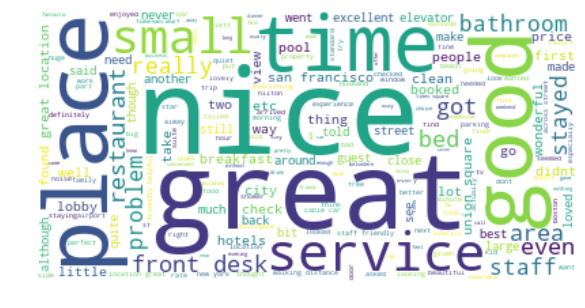

In [199]:
wordcloud = WordCloud(background_color="white").generate(text_final)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.title ="Most Frequent Words in all the Review Text after Text Clean up"
plt.axis("off")
plt.show()

In [200]:
excellent_final = " ".join(review for review in df[df["Sentiment"]=="excellent"].reviewtext)
good_final = " ".join(review for review in df[df["Sentiment"]=="good"].reviewtext)
bad_final = " ".join(review for review in df[df["Sentiment"]=="bad"].reviewtext)

### Let us look at the word cloud for each Sentiment Class

#### For Sentiment = Excellent

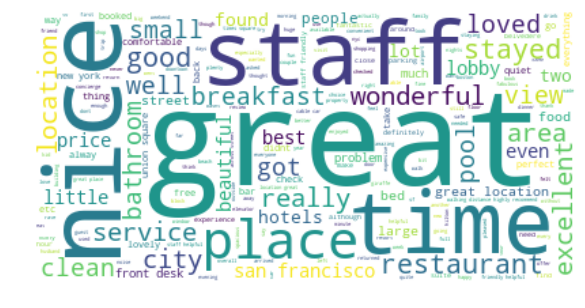

In [201]:
wordcloud_excellentfinal = WordCloud( background_color="white").generate(excellent_final)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud_excellentfinal, interpolation='bilinear')
plt.title ="Most Frequent Words in the Excellent Review Text After Cleanup"
plt.axis("off")
plt.show()

#### Now the above word cloud make sense for Excellent Sentiment as it has words like great, nice, staff

#### For Sentiment = Good

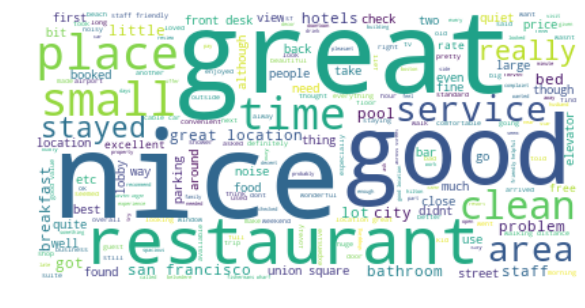

In [206]:
wordcloud_good_final = WordCloud( background_color="white").generate(good_final)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud_good_final, interpolation='bilinear')
plt.title ="Most Frequent Words in the Good Review Text After Cleanup"
plt.axis("off")
plt.show()

#### For Sentiment = Bad

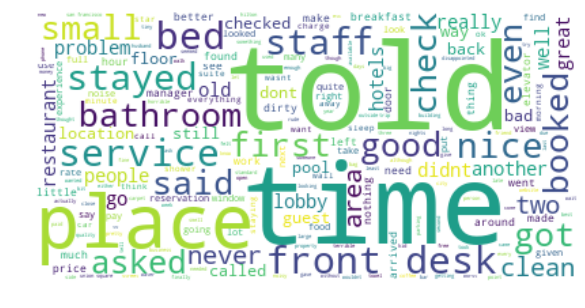

In [208]:
wordcloud_bad_final = WordCloud( background_color="white").generate(bad_final)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud_bad_final, interpolation='bilinear')
plt.title ="Most Frequent Words in the Bad Review Text After Cleanup"
plt.axis("Off")
plt.show()

In [209]:
df.head()

,Hotelid,Reviewid,reviewtext,Sentiment,tokens
0,hotel_101,Review_1,nice marriot view king bed,good,"[nice, marriot, view, king, bed]"
1,hotel_101,Review_2,good charges internet access marriott airport seattle reasonable choice sea tac area paid 189 per shuttle generally quick airport encourage use rather taxi service spotty seattle second floor back long walk matter way took interior nice check quick breakfast good restaurant bit pricey drink service bar fine complaints imagine must get noisy lobby crowd hanging thebar guess marriott new program guests charged internet service 9 95 free business center near check counters two internet pcs boar...,good,"[good, charges, internet, access, marriott, airport, seattle, reasonable, choice, sea, tac, area, paid, 189, per, shuttle, generally, quick, airport, encourage, use, rather, taxi, service, spotty, seattle, second, floor, back, long, walk, matter, way, took, interior, nice, check, quick, breakfast, good, restaurant, bit, pricey, drink, service, bar, fine, complaints, imagine, must, get, noisy, lobby, crowd, hanging, thebar, guess, marriott, new, program, guests, charged, internet, service, 9,..."
2,hotel_101,Review_3,small adequate early morning flight catch good choice right airport recently renovated new clean service fast efficient food good negatives small bathroom smallest ive encountered many years hardly turn around im small person however countertops granite nice elevator seemed odd size may self park valet park fee recommend extended fine visit,good,"[small, adequate, rooms, early, morning, flight, catch, good, choice, right, airport, recently, renovated, rooms, new, clean, service, fast, efficient, food, good, negatives, small, bathroom, smallest, ive, encountered, many, years, hardly, turn, around, im, small, person, however, countertops, granite, nice, elevator, seemed, odd, size, may, self, park, valet, park, fee, recommend, extended, fine, visit]"
3,hotel_101,Review_4,better average noisy stayed times inthe last several months first best subsequent ones got better obviously taken notes comment cards seriously located near seatac frequent shuttle tower 8 9 floors high atrium area 3 4 floors high note tower really view although advertised mt rainier views maybe trees grew regardless tower youwill looking roof ventilation roof associate entrance avoid ending x16 x18 bit noisy trucks show odd numbered tower little noisy ac frankly wasnt badthe bathrooms small...,good,"[better, average, noisy, rooms, stayed, times, inthe, last, several, months, first, best, subsequent, ones, got, better, obviously, taken, notes, comment, cards, seriously, located, near, seatac, frequent, shuttle, tower, 8, 9, floors, high, atrium, area, 3, 4, floors, high, note, tower, rooms, really, view, although, advertised, mt, rainier, views, maybe, trees, grew, regardless, tower, youwill, looking, roof, ventilation, roof, associate, entrance, avoid, rooms, ending, x16, x18, bit, nois..."
4,hotel_101,Review_5,ordinary although highly rated reviews pay premium price compared airport hotels nothing special proximity seatac thinking staying pay attention trip advisor comments hideous views hvac equipment windows whole side although top floor building view looked like industrial site equipment roof lower wing building spacious bed comfortable bathroom functional rainstorm middle ceiling leaked club lounge paid extra modest ive ever seen good food breakfast best part experience restaurant extremely or...,bad,"[ordinary, although, highly, rated, reviews, pay, premium, price, compared, airport, hotels, nothing, special, proximity, seatac, thinking, staying, pay, attention, trip, advisor, comments, hideous, views, hvac, equipment, windows, whole, side, although, top, floor, building, view, looked, like, industrial, site, equipment, roof, lower, wing, building, spacious, bed, comfortable, bathroom, functional, rainstorm, middle, ceiling, leaked, club, lounge, paid, extra, modest, ive, ever, seen, goo..."


### Understanding the New Feature Tokens 

In [210]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

all_words = [word for tokens in df["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in df["tokens"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

506945 words total, with a vocabulary size of 22543
Max sentence length is 644


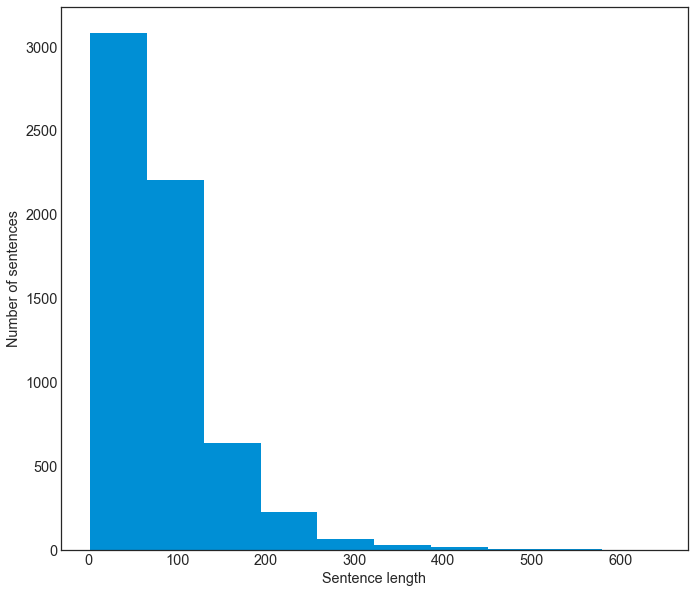

In [211]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths)
plt.show()

#### From the above bar graph we can undestand the the more of reviews are having sentence length 200 or less

### Calculate the number of words in each ReviewText

In [212]:
df['num_words'] = df.reviewtext.apply(lambda x : len(x.split()))

C:\Users\Gnanendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [214]:
df.tail(2)

,Hotelid,Reviewid,reviewtext,Sentiment,tokens,num_words
6285,hotel_200,Review_6286,new favorite staying many new york city hotels including grand old boutique far best bedroom suite spacious nyc beautiful decor balcony staff consistently friendly helpful professional reservations turn service complimentary food beverage offerings went beyond norm well location great quiet place well,excellent,"[new, favorite, staying, many, new, york, city, hotels, including, grand, old, boutique, far, best, bedroom, suite, spacious, nyc, beautiful, decor, balcony, staff, consistently, friendly, helpful, professional, reservations, turn, service, complimentary, food, beverage, offerings, went, beyond, norm, well, location, great, quiet, place, well]",42
6286,hotel_200,Review_6287,terrific union square grammercy park area giraffe good area relatively hotels location perfect visit needed near friends w union square immaculately maintained lobby extremely spacious relatively small decor furninshings tasteful comfortable welcoming staff part excellent though encounter bellman maid subpar nicely appointed really enjoyed balcony although huge definitely big enough needs particularly liked creative subtle use color decor scheme offers wonderful little perks many hotels leve...,excellent,"[terrific, union, square, grammercy, park, area, giraffe, good, area, relatively, hotels, location, perfect, visit, needed, near, friends, w, union, square, immaculately, maintained, lobby, extremely, spacious, relatively, small, decor, furninshings, tasteful, comfortable, welcoming, staff, part, excellent, though, encounter, bellman, maid, subpar, nicely, appointed, really, enjoyed, balcony, although, huge, definitely, big, enough, needs, particularly, liked, creative, subtle, use, color, d...",115


In [215]:
df['num_words'].describe()

count    6287.000000
mean       80.069986
std        66.584139
min         1.000000
25%        38.000000
50%        66.000000
75%       104.000000
max       643.000000
Name: num_words, dtype: float64

### Binning the No of Words for better understanding of how the words are ditributed

In [218]:
bins=[0,50,75, np.inf]
df['bins']=pd.cut(df.num_words, bins=[0,100,200,300,400,500, np.inf], labels=['0-100', '100-200', '200-000','300-400','400-500' ,'>500'])

C:\Users\Gnanendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [221]:
df.sample(3)

,Hotelid,Reviewid,reviewtext,Sentiment,tokens,num_words,bins
2925,hotel_150,Review_2926,great ok modern really friendly staff although ageing everthing worked fine clean comfortable booking mix resolved minutes without fuss,good,"[great, ok, modern, really, friendly, staff, although, ageing, everthing, worked, fine, clean, comfortable, booking, mix, resolved, minutes, without, fuss]",19,0-100
4627,hotel_181,Review_4628,radisson great spent two nights prior fall foliage tour new england considered several hotels picked due location gave great deluxe 17th floor balcony wonderful view downtown boston commons staff cordial restaurant good choices reasonable prices took trolley tour visited several nearby restaurants walked thru boston commons return boston,excellent,"[radisson, great, spent, two, nights, prior, fall, foliage, tour, new, england, considered, several, hotels, picked, due, location, gave, great, deluxe, 17th, floor, balcony, wonderful, view, downtown, boston, commons, staff, cordial, restaurant, good, choices, reasonable, prices, took, trolley, tour, visited, several, nearby, restaurants, walked, thru, boston, commons, return, boston]",48,0-100
5532,hotel_188,Review_5533,non smoking belvedere stayed 5 nights belvedere early june great price nyc whole non smoking great elevators little slow small deter group liking staff friendly even made jokes store bags checkout wanted leave city towels could little newer smelled little bit burnt maybe need new dryer large two full beds enough space small fridge microwave coffee maker window open 4 inches like fresh air noise street came dont like feel c two blocks restaurant row within walking distance many broadway theat...,good,"[non, smoking, belvedere, stayed, 5, nights, belvedere, early, june, great, price, nyc, whole, non, smoking, great, elevators, little, slow, small, deter, group, liking, staff, friendly, even, made, jokes, store, bags, checkout, wanted, leave, city, towels, could, little, newer, smelled, little, bit, burnt, maybe, need, new, dryer, rooms, large, two, full, beds, enough, space, small, fridge, microwave, coffee, maker, window, open, 4, inches, like, fresh, air, noise, street, came, dont, like,...",118,100-200


In [222]:
word_distribution = df.groupby('bins').size().reset_index().rename(columns={0:'counts'})

In [224]:
word_distribution.head(10)

,bins,counts
0,0-100,4613
1,100-200,1354
2,200-000,236
3,300-400,51
4,400-500,23
5,>500,10


#### From the above word distribution we can understand that more than 70% reviews are having word count less than 100

### Let us visualize the words ditribution per bin

Text(0.5,1,'Word distribution per bin')

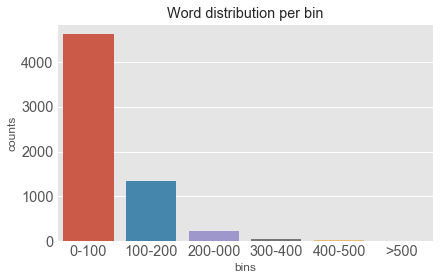

In [226]:
sns.barplot(x='bins', y='counts', data=word_distribution).set_title("Word distribution per bin")

### Histogram of text length of each each Sentiment

In [228]:
def length(text):    
    return len(text)

In [230]:
df['length'] = df['reviewtext'].apply(len)
df.head(3)

C:\Users\Gnanendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Hotelid,Reviewid,reviewtext,Sentiment,tokens,num_words,bins,length
0,hotel_101,Review_1,nice marriot view king bed,good,"[nice, marriot, view, king, bed]",5,0-100,26
1,hotel_101,Review_2,good charges internet access marriott airport seattle reasonable choice sea tac area paid 189 per shuttle generally quick airport encourage use rather taxi service spotty seattle second floor back long walk matter way took interior nice check quick breakfast good restaurant bit pricey drink service bar fine complaints imagine must get noisy lobby crowd hanging thebar guess marriott new program guests charged internet service 9 95 free business center near check counters two internet pcs boar...,good,"[good, charges, internet, access, marriott, airport, seattle, reasonable, choice, sea, tac, area, paid, 189, per, shuttle, generally, quick, airport, encourage, use, rather, taxi, service, spotty, seattle, second, floor, back, long, walk, matter, way, took, interior, nice, check, quick, breakfast, good, restaurant, bit, pricey, drink, service, bar, fine, complaints, imagine, must, get, noisy, lobby, crowd, hanging, thebar, guess, marriott, new, program, guests, charged, internet, service, 9,...",103,100-200,665
2,hotel_101,Review_3,small adequate early morning flight catch good choice right airport recently renovated new clean service fast efficient food good negatives small bathroom smallest ive encountered many years hardly turn around im small person however countertops granite nice elevator seemed odd size may self park valet park fee recommend extended fine visit,good,"[small, adequate, rooms, early, morning, flight, catch, good, choice, right, airport, recently, renovated, rooms, new, clean, service, fast, efficient, food, good, negatives, small, bathroom, smallest, ive, encountered, many, years, hardly, turn, around, im, small, person, however, countertops, granite, nice, elevator, seemed, odd, size, may, self, park, valet, park, fee, recommend, extended, fine, visit]",51,0-100,342


In [233]:
df['length'].describe()

count    6287.000000
mean      540.193574
std       444.777440
min         4.000000
25%       262.000000
50%       446.000000
75%       701.000000
max      4441.000000
Name: length, dtype: float64

#### Extracting the data of each class

In [231]:
bad_sentiment = df[df['Sentiment'] == 'bad']
excellent_sentiment = df[df['Sentiment'] == 'excellent']
good_sentiment = df[df['Sentiment'] == 'good']

### Histogram of text lenght of each Sentiment

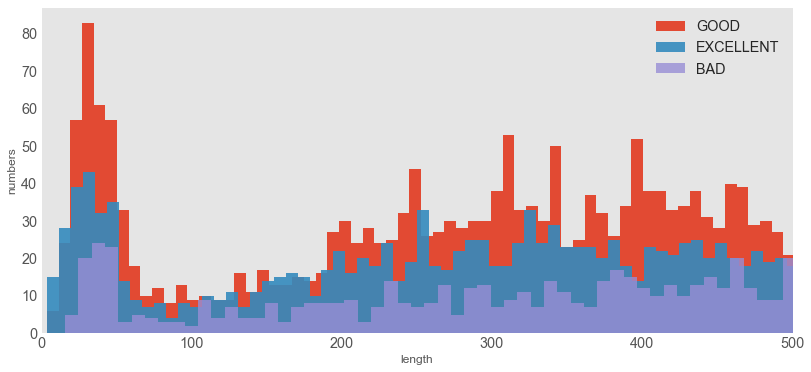

In [237]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
bins = 500
plt.hist(good_sentiment['length'], alpha = 1.0, bins=bins, label='GOOD')
plt.hist(excellent_sentiment['length'], alpha = 0.9, bins=bins, label='EXCELLENT')
plt.hist(bad_sentiment['length'],alpha = 0.8 , bins=bins, label='BAD')

plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,500)
plt.grid()
plt.show()

In [205]:
freq = pd.Series(' '.join(df['reviewtext']).split()).value_counts()[:10]
freq

great       6046
location    3988
good        3831
staff       3646
nice        3531
stayed      2995
clean       2626
get         2356
service     2335
time        2100
dtype: int64

### No of Words

In [259]:
df['word_count'] = df['reviewtext'].apply(lambda x: len(str(x).split(" ")))
df[['reviewtext','word_count']].head(3)

C:\Users\Gnanendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,reviewtext,word_count
0,nice marriot view king bed,5
1,good charges internet access marriott airport seattle reasonable choice sea tac area paid 189 per shuttle generally quick airport encourage use rather taxi service spotty seattle second floor back long walk matter way took interior nice check quick breakfast good restaurant bit pricey drink service bar fine complaints imagine must get noisy lobby crowd hanging thebar guess marriott new program guests charged internet service 9 95 free business center near check counters two internet pcs boar...,103
2,small adequate early morning flight catch good choice right airport recently renovated new clean service fast efficient food good negatives small bathroom smallest ive encountered many years hardly turn around im small person however countertops granite nice elevator seemed odd size may self park valet park fee recommend extended fine visit,51


### No Of Characters

In [260]:
df['char_count'] = df['reviewtext'].str.len() ## this also includes spac
df[['reviewtext','char_count']].head(1)

,reviewtext,char_count
0,nice marriot view king bed,26
1,good charges internet access marriott airport seattle reasonable choice sea tac area paid 189 per shuttle generally quick airport encourage use rather taxi service spotty seattle second floor back long walk matter way took interior nice check quick breakfast good restaurant bit pricey drink service bar fine complaints imagine must get noisy lobby crowd hanging thebar guess marriott new program guests charged internet service 9 95 free business center near check counters two internet pcs boar...,665
2,small adequate early morning flight catch good choice right airport recently renovated new clean service fast efficient food good negatives small bathroom smallest ive encountered many years hardly turn around im small person however countertops granite nice elevator seemed odd size may self park valet park fee recommend extended fine visit,342
3,better average noisy stayed times inthe last several months first best subsequent ones got better obviously taken notes comment cards seriously located near seatac frequent shuttle tower 8 9 floors high atrium area 3 4 floors high note tower really view although advertised mt rainier views maybe trees grew regardless tower youwill looking roof ventilation roof associate entrance avoid ending x16 x18 bit noisy trucks show odd numbered tower little noisy ac frankly wasnt badthe bathrooms small...,2051
4,ordinary although highly rated reviews pay premium price compared airport hotels nothing special proximity seatac thinking staying pay attention trip advisor comments hideous views hvac equipment windows whole side although top floor building view looked like industrial site equipment roof lower wing building spacious bed comfortable bathroom functional rainstorm middle ceiling leaked club lounge paid extra modest ive ever seen good food breakfast best part experience restaurant extremely or...,647


### Average Word Length

In [216]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

df['avg_word'] = df['reviewtext'].apply(lambda x: avg_word(x))
df[['reviewtext','avg_word']].head()

C:\Users\Gnanendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,reviewtext,avg_word
0,nice marriot view of my king bed room,3.750000
1,"good hotel, charges for internet access the marriott airport seattle is a reasonable choice in the sea tac area i paid about 189 per night the shuttle is generally quick to and from the airport and i encourage its use rather taxi service which can be very spotty in seattle my room was in the second floor but in the back of the hotel such that i had a very long walk no matter which way i took to the room the interior is nice and check in was very quick breakfast was good in the restauran...",3.991379
2,"small but adequate rooms if you have an early morning flight to catch, this is a good choice as it is right at the airport it has been recently renovated so the rooms are new and clean the room service was fast and efficient and the food was good the negatives were that our room was very small and the bathroom was the smallest i've encountered in many years hardly room to turn around and i'm a small person however, the countertops were granite, which was nice also there is only one ele...",4.156250
3,"better than average, some noisy rooms i have stayed at this hotel a few times inthe last several months the first stay was not the best, but the subsequent ones got better, and they have obviously taken some of the notes on the comment cards seriously the hotel is located near seatac with a frequent shuttle there is a tower, 8 9 floors high, and an atrium area that is about 3 4 floors high note, the tower rooms really have no view although some are advertised as having mt rainier views ...",4.216741
4,"ordinary although it is highly rated in these reviews, and you pay a premium price compared with other airport hotels, there is nothing special about this hotel other than its proximity to seatac if you are thinking of staying here, pay attention to the trip advisor comments about the hideous views of hvac equipment from the windows on one whole side of the hotel although my room was on the top floor of the building, the view looked like an industrial site, just because of all the equipmen...",4.468599


In [287]:
df['label'] = df['Sentiment'].map({'bad': 0, 'good': 1, 'excellent':2})

### Let us look at the Sentiment Analysis of Review Text Using Sentiment Intensity Analyzer

In [272]:
# Pre-Processing
SIA = SentimentIntensityAnalyzer()
df["reviewtext"]= df["reviewtext"].astype(str)

# Applying Model, Variable Creation
df['Polarity Score']=df["reviewtext"].apply(lambda x:SIA.polarity_scores(x)['compound'])
df['Neutral Score']=df["reviewtext"].apply(lambda x:SIA.polarity_scores(x)['neu'])
df['Negative Score']=df["reviewtext"].apply(lambda x:SIA.polarity_scores(x)['neg'])
df['Positive Score']=df["reviewtext"].apply(lambda x:SIA.polarity_scores(x)['pos'])

# Converting 0 to 1 Decimal Score to a Categorical Variable
df['Rating']=''
df.loc[df['Polarity Score']>0,'Rating']='Positive'
df.loc[df['Polarity Score']==0,'Rating']='Neutral'
df.loc[df['Polarity Score']<0,'Rating']='Negative'

C:\Users\Gnanendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [274]:
df.head(1)

,Hotelid,Reviewid,reviewtext,Sentiment,tokens,word_count,char_count,avg_word,stopwords,hastags,numerics,label,Polarity Score,Neutral Score,Negative Score,Positive Score,Rating
0,hotel_101,Review_1,nice marriot view of my king bed room,good,"[nice, marriot, view, of, my, king, bed, room]",14,43,3.75,2,0,0,1,0.4215,0.714,0.0,0.286,Positive


In [275]:
def percentstandardize_barplot(x,y,hue, data, ax=None, order= None):
    """
    Standardize by percentage the data using pandas functions, then plot using Seaborn.
    Function arguments are and extention of Seaborns'.
    """
    sns.barplot(x= x, y=y, hue=hue, ax=ax, order=order,
    data=(data[[x, hue]]
     .reset_index(drop=True)
     .groupby([x])[hue]
     .value_counts(normalize=True)
     .rename('Percentage').mul(100)
     .reset_index()
     .sort_values(hue)))
    plt.title("Percentage Frequency of {} by {}".format(hue,x))
    plt.ylabel("Percentage %")

### Understadning the Rating Vs Sentiment Analysis

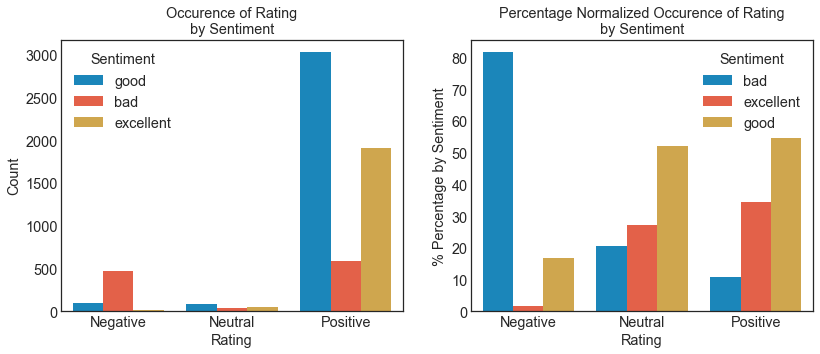

In [276]:
huevar = "Sentiment"
xvar = "Rating"
f, axes = plt.subplots(1,2,figsize=(12,5))
sns.countplot(x=xvar, hue=huevar,data=df, ax=axes[0], order=["Negative","Neutral","Positive"])
axes[0].set_title("Occurence of {}\nby {}".format(xvar, huevar))
axes[0].set_ylabel("Count")
percentstandardize_barplot(x=xvar,y="Percentage", hue=huevar,data=df, ax=axes[1])
axes[1].set_title("Percentage Normalized Occurence of {}\nby {}".format(xvar, huevar))
axes[1].set_ylabel("% Percentage by {}".format(huevar))
plt.show()

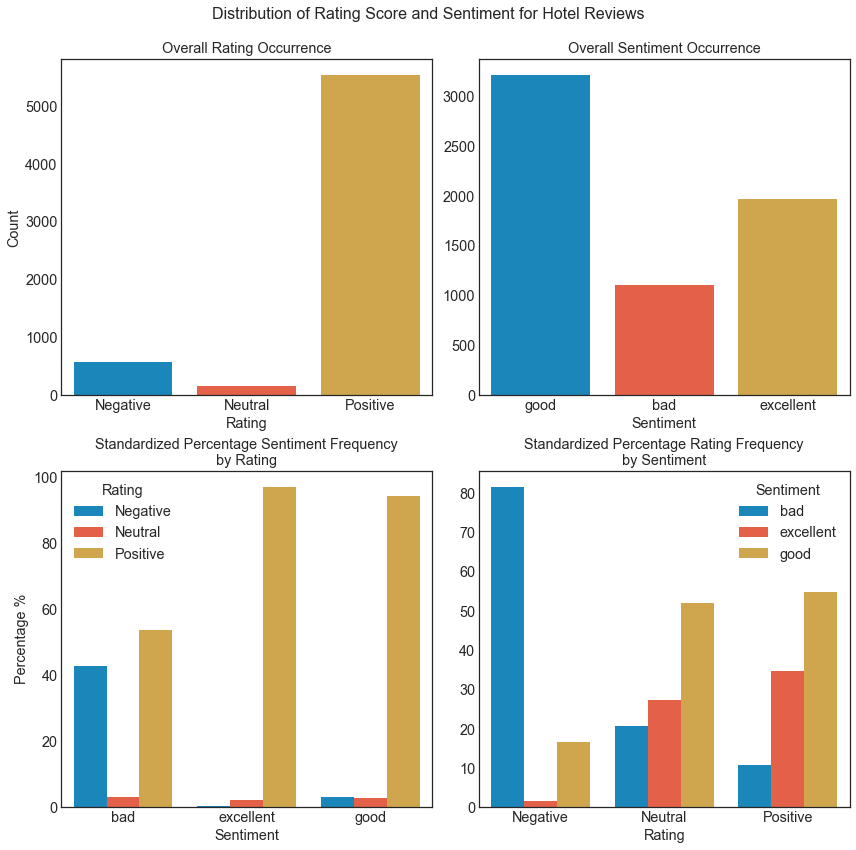

In [277]:
f, axes = plt.subplots(2,2, figsize=[12,12])
sns.countplot(x="Rating", data=df, ax=axes[0,0], order=["Negative","Neutral","Positive"])
axes[0,0].set_xlabel("Rating")
axes[0,0].set_ylabel("Count")
axes[0,0].set_title("Overall Rating Occurrence")

sns.countplot(x="Sentiment", data=df, ax=axes[0,1])
axes[0,1].set_xlabel("Sentiment")
axes[0,1].set_ylabel("")
axes[0,1].set_title("Overall Sentiment Occurrence")

percentstandardize_barplot(x="Sentiment",y="Percentage",hue="Rating",data=df, ax=axes[1,0])
axes[1,0].set_xlabel("Sentiment")
axes[1,0].set_ylabel("Percentage %")
axes[1,0].set_title("Standardized Percentage Sentiment Frequency\nby Rating")

percentstandardize_barplot(x="Rating",y="Percentage",hue="Sentiment",data=df, ax=axes[1,1])
axes[1,1].set_ylabel("Occurrence Frequency")
axes[1,1].set_title("Standardized Percentage Rating Frequency\nby Sentiment")
axes[1,1].set_xlabel("Rating")
axes[1,1].set_ylabel("")

f.suptitle("Distribution of Rating Score and Sentiment for Hotel Reviews", fontsize=16)
f.tight_layout()
f.subplots_adjust(top=0.92)
plt.show()

### Tokenizing the Text

In [263]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

df["tokens_after"] = df["reviewtext"].apply(tokenizer.tokenize)
df.head(2)

,Hotelid,Reviewid,reviewtext,Sentiment,tokens,num_words,bins,length,Polarity Score,Neutral Score,Negative Score,Positive Score,Rating,word_count,char_count,tokens_after
0,hotel_101,Review_1,nice marriot view king bed,good,"[nice, marriot, view, king, bed]",5,0-100,26,0.4215,0.588,0.000,0.412,Positive,5,26,"[nice, marriot, view, king, bed]"
1,hotel_101,Review_2,good charges internet access marriott airport seattle reasonable choice sea tac area paid 189 per shuttle generally quick airport encourage use rather taxi service spotty seattle second floor back long walk matter way took interior nice check quick breakfast good restaurant bit pricey drink service bar fine complaints imagine must get noisy lobby crowd hanging thebar guess marriott new program guests charged internet service 9 95 free business center near check counters two internet pcs boar...,good,"[good, charges, internet, access, marriott, airport, seattle, reasonable, choice, sea, tac, area, paid, 189, per, shuttle, generally, quick, airport, encourage, use, rather, taxi, service, spotty, seattle, second, floor, back, long, walk, matter, way, took, interior, nice, check, quick, breakfast, good, restaurant, bit, pricey, drink, service, bar, fine, complaints, imagine, must, get, noisy, lobby, crowd, hanging, thebar, guess, marriott, new, program, guests, charged, internet, service, 9,...",103,100-200,665,0.9666,0.667,0.077,0.256,Positive,103,665,"[good, charges, internet, access, marriott, airport, seattle, reasonable, choice, sea, tac, area, paid, 189, per, shuttle, generally, quick, airport, encourage, use, rather, taxi, service, spotty, seattle, second, floor, back, long, walk, matter, way, took, interior, nice, check, quick, breakfast, good, restaurant, bit, pricey, drink, service, bar, fine, complaints, imagine, must, get, noisy, lobby, crowd, hanging, thebar, guess, marriott, new, program, guests, charged, internet, service, 9,..."


### Stemming the Text

In [264]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['reviewtext']= df['reviewtext'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [265]:
df.head(2)

,Hotelid,Reviewid,reviewtext,Sentiment,tokens,num_words,bins,length,Polarity Score,Neutral Score,Negative Score,Positive Score,Rating,word_count,char_count,tokens_after
0,hotel_101,Review_1,nice marriot view king bed,good,"[nice, marriot, view, king, bed]",5,0-100,26,0.4215,0.588,0.000,0.412,Positive,5,26,"[nice, marriot, view, king, bed]"
1,hotel_101,Review_2,good charg internet access marriott airport seattl reason choic sea tac area paid 189 per shuttl gener quick airport encourag use rather taxi servic spotti seattl second floor back long walk matter way took interior nice check quick breakfast good restaur bit pricey drink servic bar fine complaint imagin must get noisi lobbi crowd hang thebar guess marriott new program guest charg internet servic 9 95 free busi center near check counter two internet pc board pass access pc person abil sit ch...,good,"[good, charges, internet, access, marriott, airport, seattle, reasonable, choice, sea, tac, area, paid, 189, per, shuttle, generally, quick, airport, encourage, use, rather, taxi, service, spotty, seattle, second, floor, back, long, walk, matter, way, took, interior, nice, check, quick, breakfast, good, restaurant, bit, pricey, drink, service, bar, fine, complaints, imagine, must, get, noisy, lobby, crowd, hanging, thebar, guess, marriott, new, program, guests, charged, internet, service, 9,...",103,100-200,665,0.9666,0.667,0.077,0.256,Positive,103,665,"[good, charges, internet, access, marriott, airport, seattle, reasonable, choice, sea, tac, area, paid, 189, per, shuttle, generally, quick, airport, encourage, use, rather, taxi, service, spotty, seattle, second, floor, back, long, walk, matter, way, took, interior, nice, check, quick, breakfast, good, restaurant, bit, pricey, drink, service, bar, fine, complaints, imagine, must, get, noisy, lobby, crowd, hanging, thebar, guess, marriott, new, program, guests, charged, internet, service, 9,..."


### Lemmatizing

In [266]:
from textblob import Word
df['reviewtext'] = df['reviewtext'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['reviewtext'].head(2)

C:\Users\Gnanendra\Anaconda3\lib\site-packages\nltk\corpus\reader\wordnet.py:1107: ResourceWarning: unclosed file <_io.BufferedReader name='C:\\Users\\Gnanendra\\AppData\\Roaming\\nltk_data\\corpora\\wordnet\\lexnames'>
  for i, line in enumerate(self.open('lexnames')):
C:\Users\Gnanendra\Anaconda3\lib\site-packages\nltk\corpus\reader\wordnet.py:1159: ResourceWarning: unclosed file <_io.BufferedReader name='C:\\Users\\Gnanendra\\AppData\\Roaming\\nltk_data\\corpora\\wordnet\\index.adj'>
  for i, line in enumerate(self.open('index.%s' % suffix)):
C:\Users\Gnanendra\Anaconda3\lib\site-packages\nltk\corpus\reader\wordnet.py:1159: ResourceWarning: unclosed file <_io.BufferedReader name='C:\\Users\\Gnanendra\\AppData\\Roaming\\nltk_data\\corpora\\wordnet\\index.adv'>
  for i, line in enumerate(self.open('index.%s' % suffix)):
C:\Users\Gnanendra\Anaconda3\lib\site-packages\nltk\corpus\reader\wordnet.py:1159: ResourceWarning: unclosed file <_io.BufferedReader name='C:\\Users\\Gnanendra\\AppDa

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             nice marriot view king bed
1    good charg internet access marriott airport seattl reason choic sea tac area paid 189 per shuttl gener quick airport encourag use rather taxi servic spotti seattl second floor back long walk matter way took interior nice check quick breakfast good restaur bit pricey drink servic bar fine complaint imagin must get noisi lobbi crowd hang thebar guess marriott new program guest charg internet servic 9 95 free busi center near check counter two internet pc board pas access pc person abil s

### Saving Preprocessed Text to Disk

In [268]:
df.to_csv("Hotels_PreProcessed")

In [295]:
df.head(1)

,Hotelid,Reviewid,reviewtext,Sentiment,tokens,num_words,bins,length,Polarity Score,Neutral Score,Negative Score,Positive Score,Rating,word_count,char_count,tokens_after,label
0,hotel_101,Review_1,nice marriot view king bed,good,"[nice, marriot, view, king, bed]",5,0-100,26,0.4215,0.588,0.0,0.412,Positive,5,26,"[nice, marriot, view, king, bed]",1


# Date Exploration, Visualization and Preprocessing of Review Text done so far

# Building Logistic Regression Model using Count Vectorizer and TF-IDF

### Bag of Words Counts

In [269]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def cv(data):
    count_vectorizer = CountVectorizer()

    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer

list_corpus = df["reviewtext"].tolist()
list_labels = df["Sentiment"].tolist()

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, 
                                                                                random_state=40)

X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

In [270]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train_counts, y_train)

y_predicted_logistic = clf.predict(X_test_counts)

C:\Users\Gnanendra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gnanendra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [271]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted_logistic)
print("Logistic Regression accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

Logistic Regression accuracy = 0.687, precision = 0.690, recall = 0.687, f1 = 0.686


## TF-IDF

In [284]:
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()

    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer

X_train_tfidf, tfidf_vectorizer = tfidf(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [285]:
from sklearn.linear_model import LogisticRegression

tfidf_lr = LogisticRegression()
tfidf_lr.fit(X_train_tfidf, y_train)

y_predicted_logistic = clf.predict(X_test_tfidf)

accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted_logistic)
print("TF-IDF Logistic Regression accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

C:\Users\Gnanendra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gnanendra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


TF-IDF Logistic Regression accuracy = 0.616, precision = 0.626, recall = 0.616, f1 = 0.602
